In [102]:
library(Seurat)
library(ggplot2)
library(mltools)
library(data.table)
library(lsa)
library(aricode)
library(kBET)
library(cowplot)
options(repr.plot.width=14, repr.plot.height=10)
library(viridis)
library("hrbrthemes")
setwd('/gpfs/ysm/pi/zhao-data/wd262/new_cytof/CyTOF_classification')
source('preparation.R')

In [2]:
seur_files <- list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/covid_Rodriguez/only_A0', pattern='*seur*', full=T, ignore.case = TRUE)
rst_files <- list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/covid_Rodriguez/only_A0', pattern='*rst*', full=T, ignore.case = TRUE)
p40_files <- list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/covid_Rodriguez/only_A0', pattern=glob2rx('*COV-40*'), full=T, ignore.case = TRUE)
p34_files <- list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/covid_Rodriguez/only_A0', pattern=glob2rx('*COV-34*'), full=T, ignore.case = TRUE)
rst_40_files <- intersect(rst_files,p40_files)
rst_34_files <- intersect(rst_files,p34_files)
seur_40_files <- intersect(seur_files,p40_files)
seur_34_files <- intersect(seur_files,p34_files)

In [151]:
metadata <- read.csv("/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/meta_data.csv",row.names = 1)
A0 <- read.csv('/gpfs/ysm/pi/zhao-data/wd262/new_cytof/CyTOF_classification/write/matrix_A0/A0_covid_Rodrigeuz.csv',header =T, row.names=1)


In [45]:
seur <- readRDS(seur_40_files[6])
rst <- readRDS(rst_40_files[6])
H_est <- data.frame(rst$H)
H_est <- cbind(matrix(colnames(A0),ncol=1),H_est)
celltype_pred <- apply(rst$H, 2, predict_realdata)

In [46]:
table(celltype_pred)

celltype_pred
  CD16..Basophil CD16..Basophil.1    CD39.Mem.Treg            CD4.T 
               0              843                0              368 
           CD8.T       Eosinophil              gdT             MAIT 
             440             6102              592             1361 
             mDC         Mem.Treg         Memory.B         Monocyte 
             194                0                0                0 
         Naive.B       Naive.Treg       Neutrophil               NK 
             787              891             2784                6 
             pDC      Plasmablast 
             644             1608 

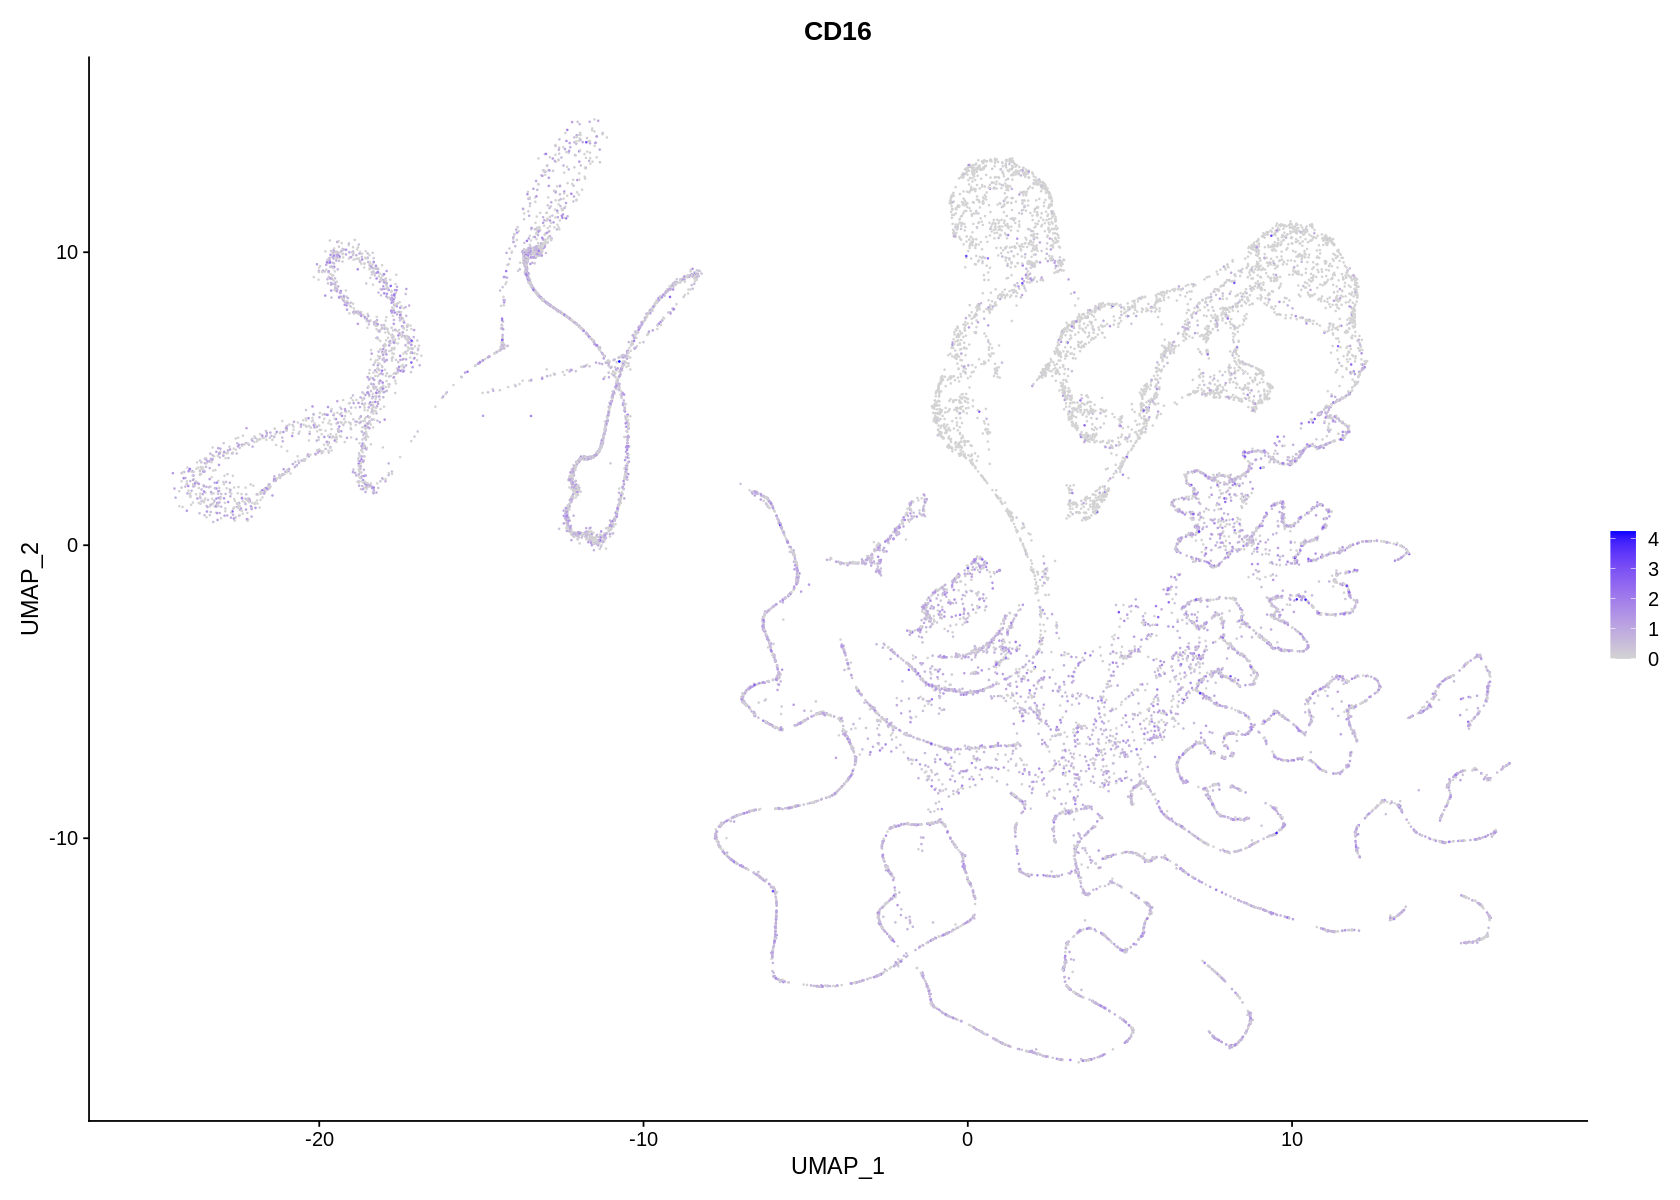

In [70]:
FeaturePlot(seur,"CD16")

In [62]:
expr.dir <-"/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-40_20200504.rds"
expr <- readRDS(expr.dir)
lineage_channels = rownames(A0)
channels <- c(lineage_channels,c('CD45','CD26','CD57','CD49d','CD43','CD45RB','CD81','CD52','CD1c','CD64','154Gd','CX3CR1','CD9','CD34','CD22','CD29','CD137','CD62L','CD141','CD85j','CD147','CD99','CD39','CD5','CD7'))
X <- expr[,channels]
X <- t(as.matrix(X))
A0 <- as.matrix(A0)

In [63]:
    seur <- CreateSeuratObject(X)
    seur <- NormalizeData(seur) 
    seur@assays$RNA@data = seur@assays$RNA@counts
    seur <- FindVariableFeatures(seur, slot='counts', selection.method = "vst", nfeatures = 10)
    seur <- ScaleData(seur)
    seur <- RunPCA(seur,verbose = TRUE,features = rownames(seur))
    seur <- FindNeighbors(seur, dims = 1:6)
    seur <- FindClusters(seur, resolution = 1)
    seur <- RunUMAP(seur, dims = 1:5)

Warning message:
“The following arguments are not used: slot”
Centering and scaling data matrix

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 38 features requested have not been scaled (running reduction without them): CD3, IgD, CD4, CD8a, CD11c, CD16, CD14, CD127, CD33, CD24, TCRgd, CD123, CD56, CD25, HLA-DR, CD28, CD38, CD55, Siglec-8, CD45, CD26, CD49d, CD43, CD45RB, CD81, CD52, CD64, 154Gd, CD34, CD22, CD137, CD62L, CD141, CD85j, CD147, CD39, CD5, CD7”
Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message in irlba(A = t(x = object), nv = npcs, ...):
“did not converge--results might be invalid!; try increasing work or maxit”
PC_ 1 
Positive:  CX3CR1, CD29, CD9, CD20, CD99, CD45RA, CD27, CD57, CD161, CD1c 
Negative:  CD1c, CD161, CD57, CD27, CD45RA, CD99, CD20, CD9, CD29, CX3CR1 
PC_ 2 
Positive:  CD27, CD45RA, CD

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 16620
Number of edges: 7650231

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.0246
Number of communities: 5
Elapsed time: 15 seconds


19:35:24 UMAP embedding parameters a = 0.9922 b = 1.112

19:35:24 Read 16620 rows and found 5 numeric columns

19:35:24 Using Annoy for neighbor search, n_neighbors = 30

19:35:24 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

19:35:29 Writing NN index file to temp file /tmp/Rtmp7WXqKs/file1a4c5844c2a0

19:35:29 Searching Annoy index using 1 thread, search_k = 3000

19:35:39 Annoy recall = 73.35%

19:35:39 Commencing smooth kNN distance calibration using 1 thread

19:35:40 6562 smooth knn distance failures

19:35:41 Initializing from normalized Laplacian + noise

19:35:44 Commencing optimization for 200 epochs, with 548034 positive edges

19:36:38 Optimization finished



In [15]:
table(celltype_pred)

celltype_pred
  CD16..Basophil CD16..Basophil.1    CD39.Mem.Treg            CD4.T 
               0               11                0               38 
           CD8.T       Eosinophil              gdT             MAIT 
               0                0               31              338 
             mDC         Mem.Treg         Memory.B         Monocyte 
             403             2255                0                0 
         Naive.B       Naive.Treg       Neutrophil               NK 
            5425              478             4554             1514 
             pDC      Plasmablast 
             741              995 

In [4]:
A0

,CD8.T,CD4.T,Mem.Treg,CD39.Mem.Treg,Naive.Treg,gdT,Naive.B,Memory.B,Plasmablast,NK,pDC,mDC,Monocyte,Eosinophil,Neutrophil,MAIT,CD16..Basophil,CD16..Basophil.1
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
CD3,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1
IgD,0,0,0,0,0,0,1,-1,0,0,0,0,0,0,0,0,0,0
CD20,0,0,0,0,0,0,1,1,-1,-1,-1,-1,-1,0,0,0,0,0
CD4,-1,1,1,1,1,-1,0,0,0,0,0,0,0,0,0,-1,0,0
CD8a,1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0
CD11c,0,0,0,0,0,0,0,0,0,0,1,-1,0,0,0,0,0,0
CD16,0,0,0,0,0,0,0,0,0,0,-1,-1,0,0,1,0,1,-1
CD14,0,0,0,0,0,0,0,0,0,-1,-1,-1,1,0,-1,0,0,0
CD45RA,0,0,-1,-1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
rst_40_files

[1] "/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/covid_Rodriguez/only_A0/rst_COV-40_20200426.rds"
[2] "/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/covid_Rodriguez/only_A0/rst_COV-40_20200427.rds"
[3] "/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/covid_Rodriguez/only_A0/rst_COV-40_20200428.rds"
[4] "/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/covid_Rodriguez/only_A0/rst_COV-40_20200430.rds"
[5] "/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/covid_Rodriguez/only_A0/rst_COV-40_20200502.rds"
[6] "/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/covid_Rodriguez/only_A0/rst_COV-40_20200504.rds"
[7] "/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/covid_Rodriguez/only_A0/rst_COV-40_20200506.rds"

In [6]:
## patient 40
day <- c(0,1,2,4,6,8,10)
rst <- readRDS(rst_40_files[1])
seur <- readRDS(seur_40_files[1])

In [7]:
H_est <- data.frame(rst$H)
H_est <- cbind(matrix(colnames(A0),ncol=1),H_est)

In [8]:
H_est[,1:10]

"matrix(colnames(A0), ncol = 1)",X1,X2,X3,X4,X5,X6,X7,X8,X9
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CD8.T,1.697820e-22,1.948044e-13,4.914199e-01,3.454645e-01,7.361970e-02,2.834986e-03,2.033858e-17,2.572199e-08,3.397884e-07
CD4.T,9.507938e-54,3.882252e-13,1.706651e-10,6.683305e-10,4.147705e-05,3.688296e-03,7.993229e-07,1.107004e-04,1.328335e-03
Mem.Treg,3.727955e-56,4.606757e-13,3.472441e-02,2.102669e-10,2.145302e-05,1.143285e-01,3.970878e-11,2.521824e-03,1.037867e-02
CD39.Mem.Treg,3.727955e-56,4.606757e-13,3.472441e-02,2.102669e-10,2.145302e-05,1.143285e-01,3.970878e-11,2.521824e-03,1.037867e-02
Naive.Treg,6.240758e-41,1.729427e-12,7.171789e-11,8.567985e-14,1.838122e-06,7.658569e-04,1.584901e-11,1.297904e-06,2.288660e-05
gdT,1.006846e-55,2.754503e-13,5.263226e-02,1.751994e-10,1.799149e-05,1.712628e-01,2.589995e-11,2.917607e-03,8.630517e-03
Naive.B,8.450791e-60,5.535558e-11,3.051428e-04,5.726755e-06,1.571987e-06,6.085996e-02,2.936474e-08,1.431908e-01,2.036925e-02
Memory.B,1.093114e-55,6.411306e-13,1.837733e-02,5.564326e-10,1.114790e-05,8.527711e-02,6.006319e-11,2.967891e-03,8.537062e-03
Plasmablast,4.436327e-33,2.984671e-10,9.630465e-02,2.995254e-02,4.381207e-02,4.926540e-04,4.510376e-09,2.144575e-01,1.919369e-02


In [104]:
ct_cnt_pred <- data.frame(matrix(rep(0,nrow(H_est)),nrow=1,ncol=nrow(H_est)))
ct_cnt_pred_sub <- data.frame(matrix(rep(0,nrow(H_est)),nrow=1,ncol=nrow(H_est)))
colnames(ct_cnt_pred) <- colnames(ct_cnt_pred_sub) <- H_est[,1]
delete.sample <- c()
#acc_subsetting <- c()

for(sample.idx in 1:length(rst_files)){
    rst <- readRDS(rst_files[sample.idx])
    seur <- readRDS(seur_files[sample.idx])

    H_est <- data.frame(rst$H)
    H_est <- cbind(matrix(colnames(A0),ncol=1),H_est)
    celltype_pred <- apply(rst$H, 2, predict_realdata)
    seur@meta.data$pred <- celltype_pred
    saveRDS(seur, seur_files[sample.idx])
    
    ## subsetting
    H_est_subsetting <- H_est[,-1]
    H_est_subsetting <- apply(H_est_subsetting,2,function(x) x/sum(x))
    if(max(H_est_subsetting)<.2){
        delete.sample <- append(delete.sample,sample.idx)
        
        ct_cnt_pred_sub <- rbind(ct_cnt_pred_sub,rep(0,ncol(ct_cnt_pred_sub)))    
        ct_cnt_pred <- rbind(ct_cnt_pred,rep(0,ncol(ct_cnt_pred_sub)))
    }else{                          

    idx.subsetting = c()
    N.subsetting = 0                          
    for(i in 1:length(seur$pred)){
        if(max(H_est_subsetting[,i])>0.4){
            idx.subsetting = append(idx.subsetting,i)
            N.subsetting = N.subsetting+1
        }

    }
    print(c(sample.idx,N.subsetting,ncol(seur)))                          
              
                              
    # cell type proportions
    seur_sub <- subset(seur, cells=Cells(seur)[idx.subsetting])
    ct_cnt_pred_sub <- rbind(ct_cnt_pred_sub,table(seur_sub$pred)[colnames(ct_cnt_pred_sub)])
    
    ct_cnt_pred <- rbind(ct_cnt_pred,table(seur$pred)[colnames(ct_cnt_pred)])
        
    }

                              
}

[1]     1  3537 17732
[1]     2  7129 18347
[1]     3  2566 18259
[1]     4  7707 17275
[1]     5 11693 17600
[1]   6 309 545
[1]    7 5983 9463
[1]     8  6670 17691
[1]     9 10239 17589
[1]    11  9007 17781
[1]    12 15100 17605
[1]    13  3905 17843
[1]    14  2123 14681
[1]    15   729 17411
[1]    16 13795 17306
[1]    17 14188 16750
[1]    18  1169 17141
[1]    19  2377 17155
[1]    20  4936 16750
[1]    21  4242 16921
[1]    22  7925 16984
[1]    23  7653 17745
[1]    24  6136 17370
[1]    26  4084 14753
[1]   27  137 2896
[1]    28  2220 15123
[1]   29 1720 2539
[1]    30 15435 15516
[1]    31 14564 14621
[1]    32   977 16334
[1]    34  6501 15655
[1]    35  1780 16688
[1]    37  3892 16095
[1]    38 17512 17939
[1]    40  1303 14316
[1]    43 16582 16639
[1]    45  1684 16723
[1]    46  3601 16564
[1]    47 13885 16026
[1]    48  1314 18102
[1]    49  2800 17295
[1]    50  5951 16927
[1]    51 13786 18064
[1]    52  9569 17319
[1]    53 13507 16274
[1]    54  6850 15546
[1]

In [152]:
colnames(metadata)[5] <- "Days_after_First_Day"
metadata$Days_After_Admission <- 0

In [153]:
for(subject in unique(metadata$Subject.ID)){
    metadata_subject <- metadata[which(metadata$Subject.ID==subject),]
    min.day <- min(metadata_subject$Days_after_First_Day)
    metadata_subject$Days_After_Admission <- metadata_subject$Days_after_First_Day-min.day
    metadata[which(metadata$Subject.ID==subject),]<- metadata_subject
    }

In [154]:
metadata_prop <- metadata
metadata_prop_sub <- metadata
metadata_prop <- cbind(metadata_prop,t(apply(ct_cnt_pred[-1,],1,function(x) x/sum(x))))
metadata_prop_sub <- cbind(metadata_prop_sub,t(apply(ct_cnt_pred_sub[-1,],1,function(x) x/sum(x))))

In [155]:
metadata <- metadata[-delete.sample,]
metadata_prop <- metadata_prop[-delete.sample,]
metadata_prop_sub <- metadata_prop_sub[-delete.sample,]

In [156]:
str(metadata)

'data.frame':	71 obs. of  7 variables:
 $ Sample.ID           : Factor w/ 80 levels "COV-10_20200408",..: 1 2 3 4 5 6 7 8 9 11 ...
 $ Subject.ID          : Factor w/ 37 levels "COV-10","COV-11",..: 1 2 3 4 5 6 7 8 9 11 ...
 $ Patient_Group       : Factor w/ 4 levels "Acute","ICU",..: 4 4 NA 4 4 4 4 4 4 4 ...
 $ Date                : Factor w/ 24 levels "2020-04-08","2020-04-09",..: 1 1 NA 1 1 1 1 1 2 2 ...
 $ Days_after_First_Day: int  0 0 NA 0 0 0 0 0 0 0 ...
 $ dir                 : Factor w/ 80 levels "/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-10_20200408.rds",..: 1 2 3 4 5 6 7 8 9 11 ...
 $ Days_After_Admission: num  0 0 NA 0 0 0 0 0 0 0 ...


In [157]:
table(metadata_prop$Subject.ID)


COV-10 COV-11 COV-12 COV-13 COV-14 COV-15 COV-16 COV-17 COV-18 COV-19 COV-20 
     1      1      1      1      1      1      1      1      1      0      1 
COV-21 COV-22 COV-23 COV-24 COV-26 COV-27 COV-29  COV-3 COV-30 COV-31 COV-32 
     1      1      1      3      6      1      3      1      1      1      2 
COV-33 COV-34 COV-35 COV-36 COV-37 COV-39  COV-4 COV-40 COV-41 COV-42 COV-43 
     1      7      4      2      5      4      1      7      3      1      1 
 COV-5  COV-7  COV-8  COV-9 
     1      1      1      1 

In [123]:
metadata_prop

,Sample.ID,Subject.ID,Patient_Group,Date,Days_After_Admission,dir,CD8.T,CD4.T,Mem.Treg,CD39.Mem.Treg,⋯,Plasmablast,NK,pDC,mDC,Monocyte,Eosinophil,Neutrophil,MAIT,CD16..Basophil,CD16..Basophil.1
,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,COV-10_20200408,COV-10,Recovery,2020-04-08,0,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-10_20200408.rds,0.0113918340,1.691857e-04,0.0000000000,0.000000e+00,⋯,0.0447778028,0.0164674036,0.001691857,0.312767877,0.0270133093,0.0950259418,0.001071509,5.639522e-05,4.390932e-01,0.0000000000
2,COV-11_20200408,COV-11,Recovery,2020-04-08,0,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-11_20200408.rds,0.0662233608,6.213550e-03,0.0013626206,1.144601e-03,⋯,0.0095383441,0.0041423666,0.010083392,0.011446013,0.0201122799,0.0094838393,0.711287949,2.180193e-03,2.534474e-02,0.0609908977
3,COV-12_20200409,COV-12,NA,NA,NA,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-12_20200409.rds,0.0668711320,1.500630e-02,0.0176899063,4.381401e-03,⋯,0.0083246618,0.0282600361,0.005805356,0.045292732,0.0535078591,0.0179637439,0.598608905,4.288296e-02,2.470015e-02,0.0472643628
4,COV-13_20200408,COV-13,Recovery,2020-04-08,0,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-13_20200408.rds,0.0472358900,1.123010e-02,0.0050940666,4.052098e-04,⋯,0.0280752533,0.0212445731,0.010246020,0.282894356,0.0481041968,0.1110274964,0.083878437,1.400868e-02,1.206368e-01,0.0166714906
5,COV-14_20200408,COV-14,Recovery,2020-04-08,0,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-14_20200408.rds,0.0000000000,1.329545e-02,0.0000000000,0.000000e+00,⋯,0.3370454545,0.0001704545,0.000000000,0.648295455,0.0000000000,0.0002272727,0.000000000,0.000000e+00,1.136364e-04,0.0000000000
6,COV-15_20200408,COV-15,Recovery,2020-04-08,0,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-15_20200408.rds,0.1229357798,4.403670e-02,0.0000000000,0.000000e+00,⋯,0.0000000000,0.0201834862,0.000000000,0.104587156,0.0018348624,0.0532110092,0.100917431,9.174312e-02,1.834862e-03,0.4036697248
7,COV-16_20200408,COV-16,Recovery,2020-04-08,0,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-16_20200408.rds,0.0464968826,6.023460e-03,0.0002113495,9.193702e-03,⋯,0.0468139068,0.0366691324,0.017119307,0.131670718,0.1111698193,0.0936278136,0.256472577,2.113495e-03,0.000000e+00,0.1063087816
8,COV-17_20200408,COV-17,Recovery,2020-04-08,0,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-17_20200408.rds,0.0086484653,1.023119e-02,0.0001130518,1.413148e-03,⋯,0.0194449155,0.0210276412,0.042790119,0.056243288,0.0030523995,0.1703691142,0.426714148,6.647448e-02,3.391555e-03,0.0169577751
9,COV-18_20200409,COV-18,Recovery,2020-04-09,0,/gpfs/loomis/pi/zhao2/wd262/shared_data/CyTOF/covid_Rodriguez/expr_trans_singlets/COV-18_20200409.rds,0.0000000000,4.548297e-04,0.7927682074,0.000000e+00,⋯,0.0077889590,0.0000000000,0.045312411,0.094149753,0.0000000000,0.0000000000,0.000000000,4.269714e-02,0.000000e+00,0.0000000000


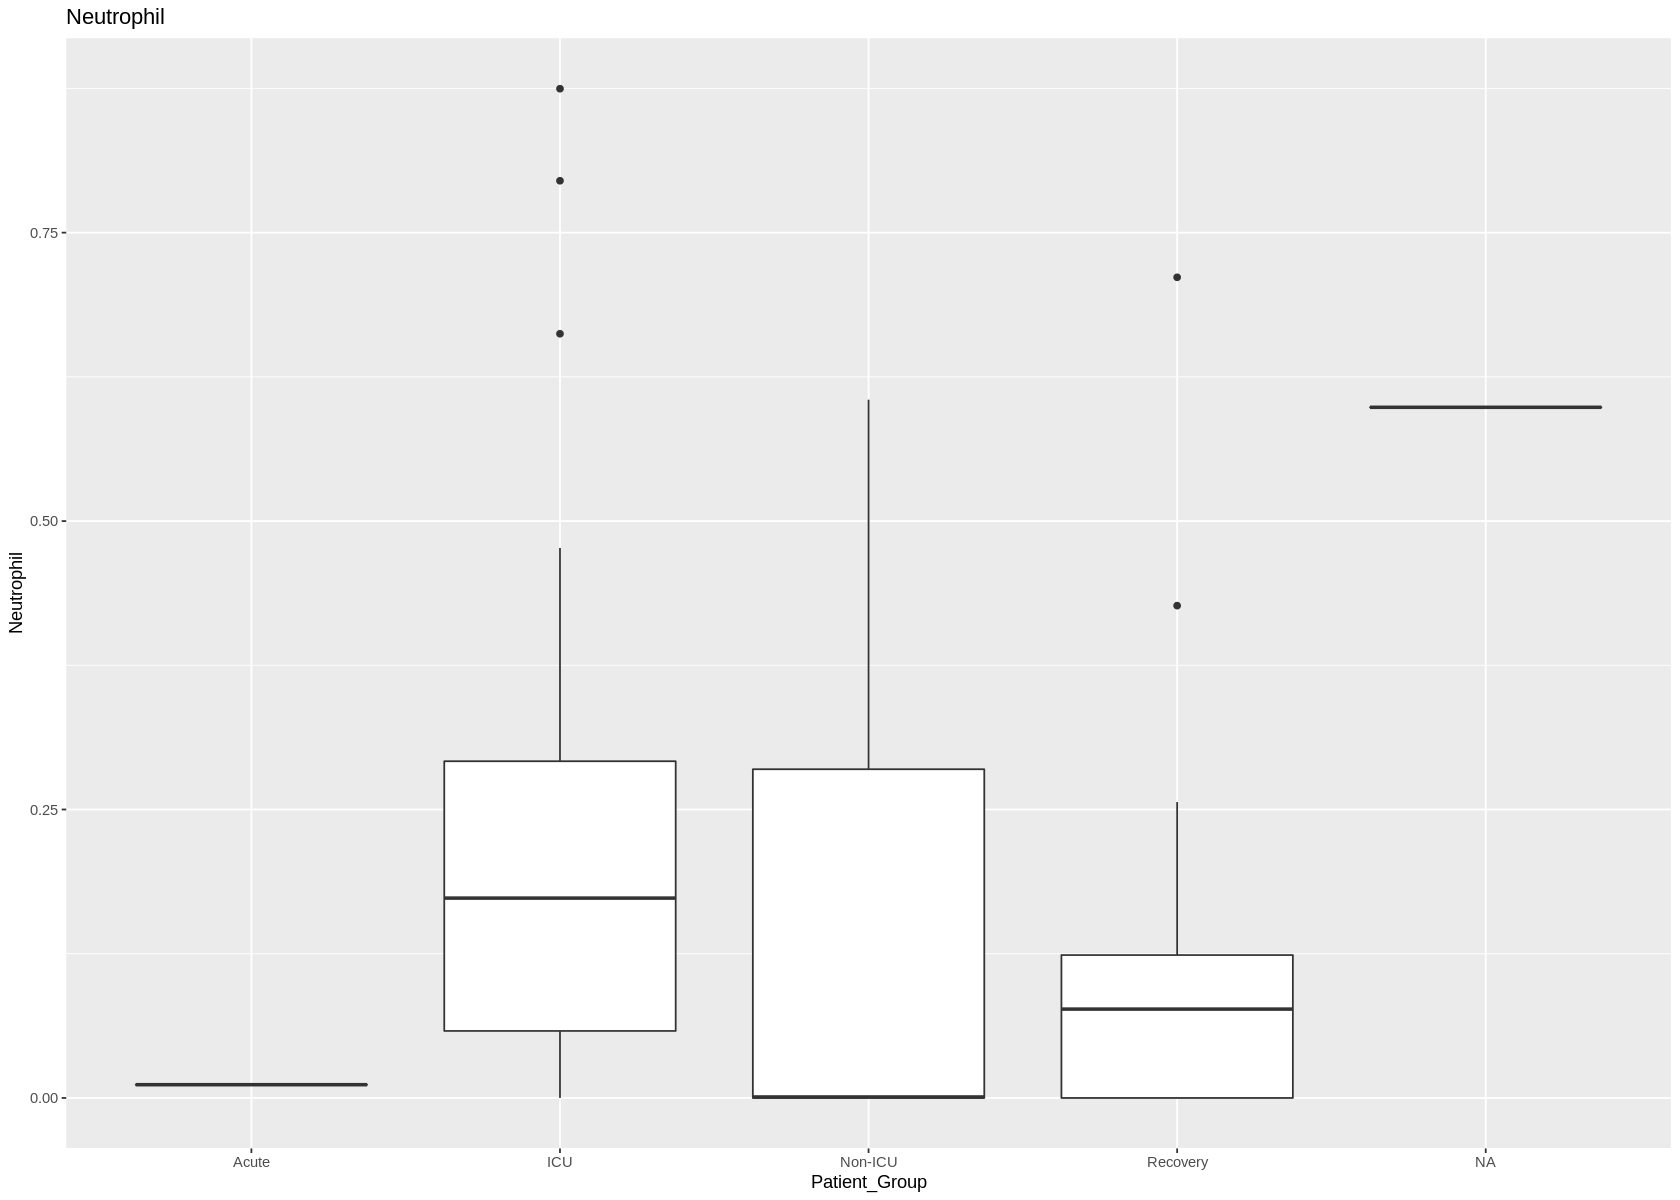

In [127]:
ggplot(metadata_prop, aes(x=Patient_Group, y=Neutrophil)) + 
    geom_boxplot()+ ggtitle("Neutrophil")

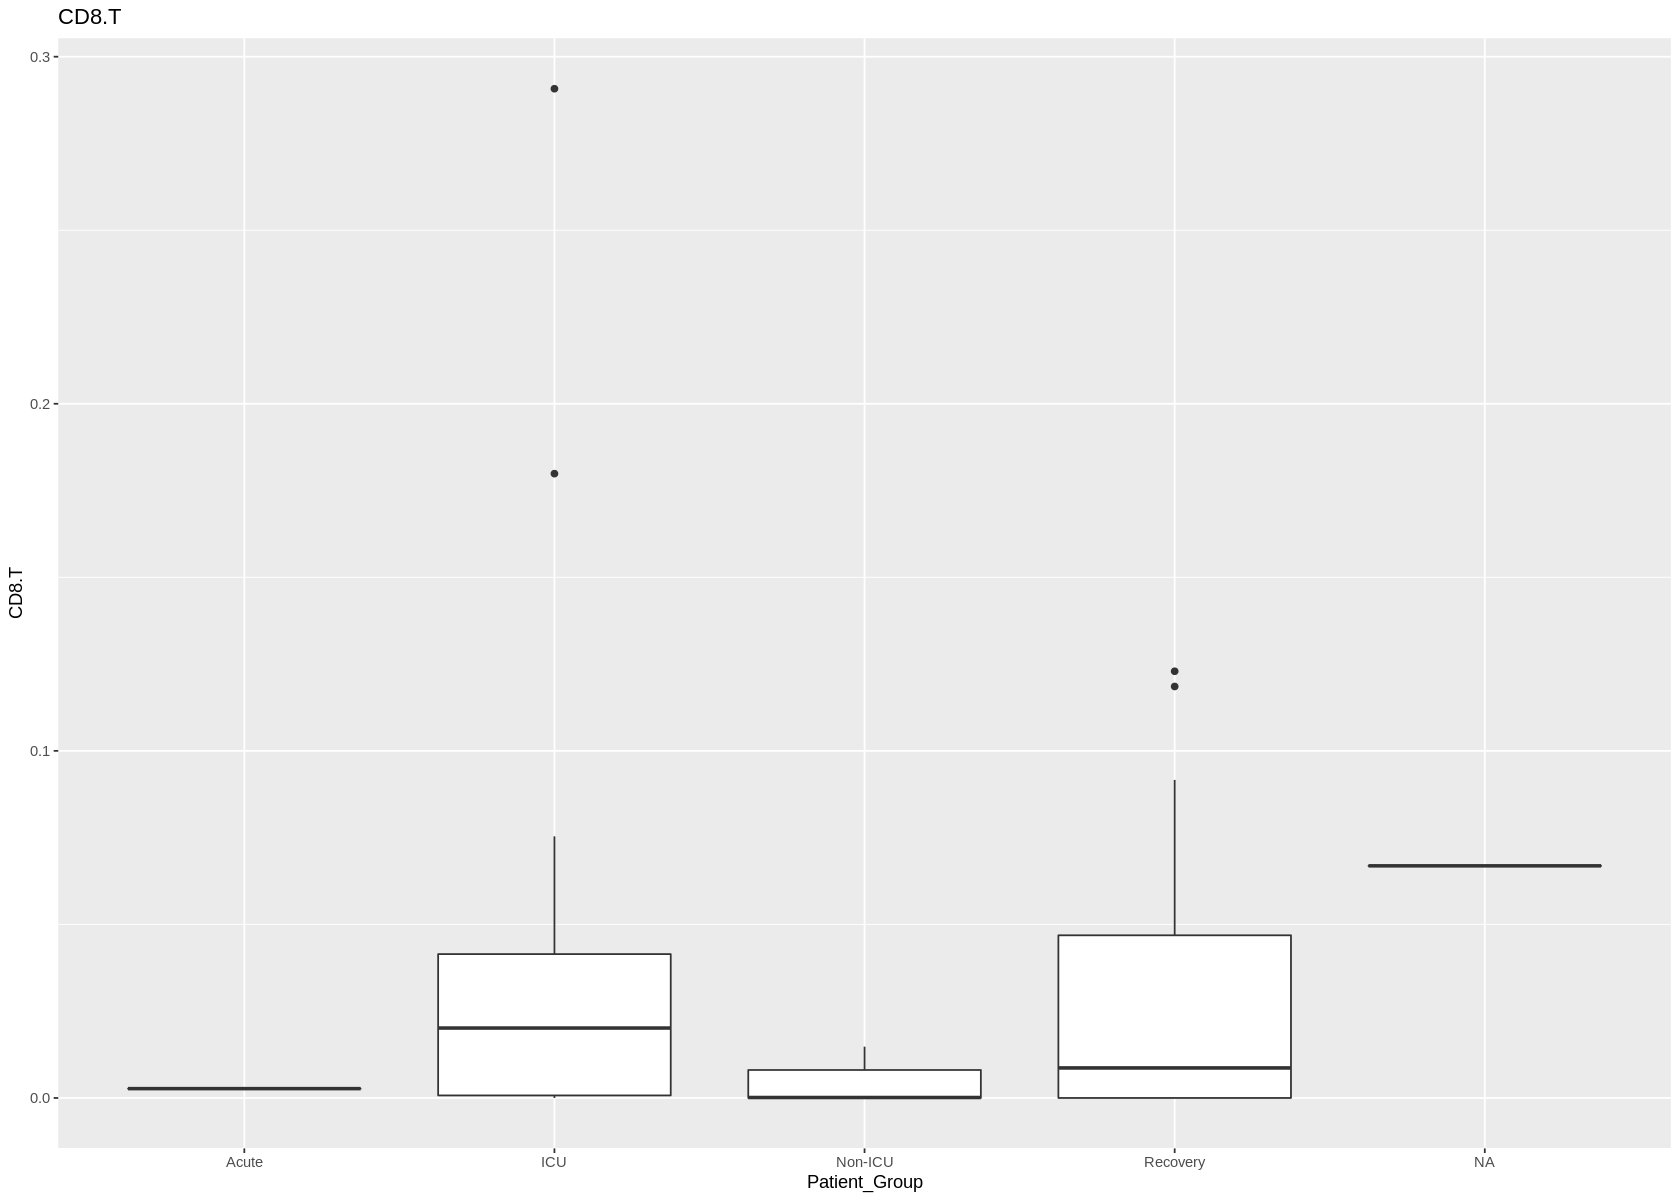

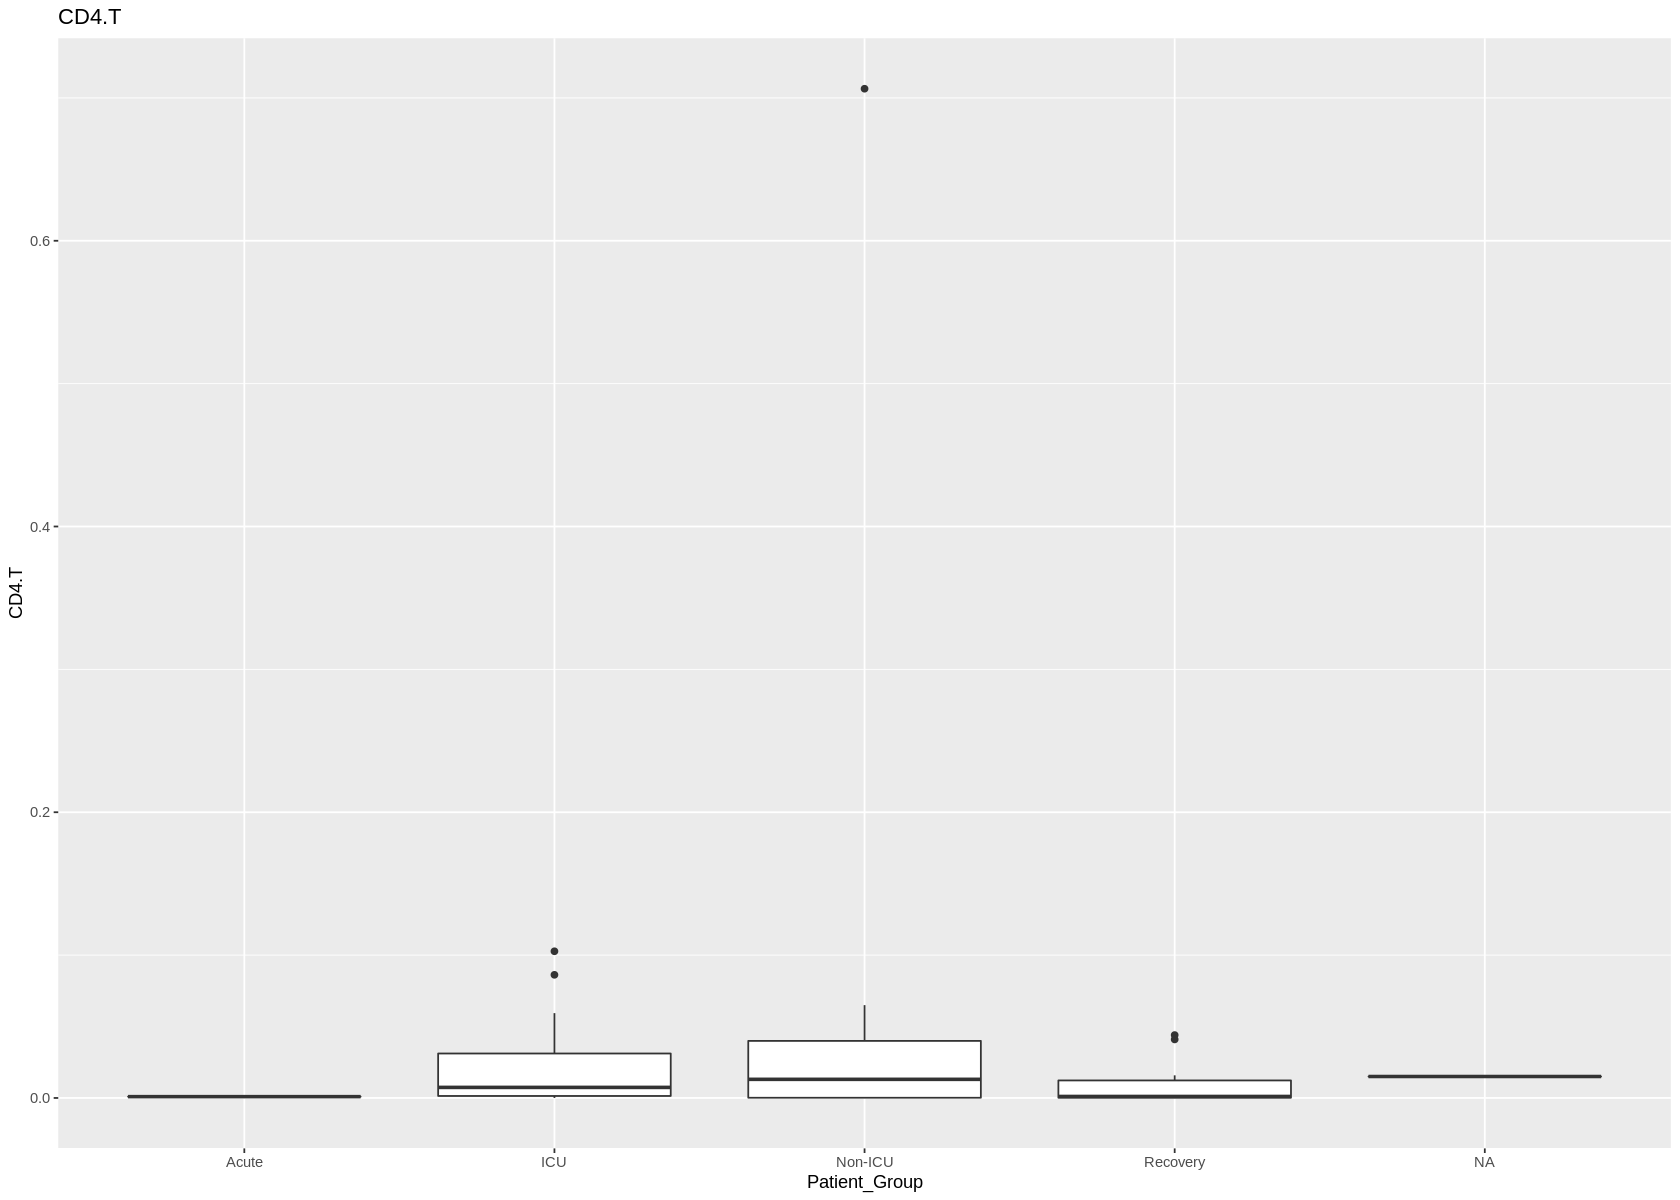

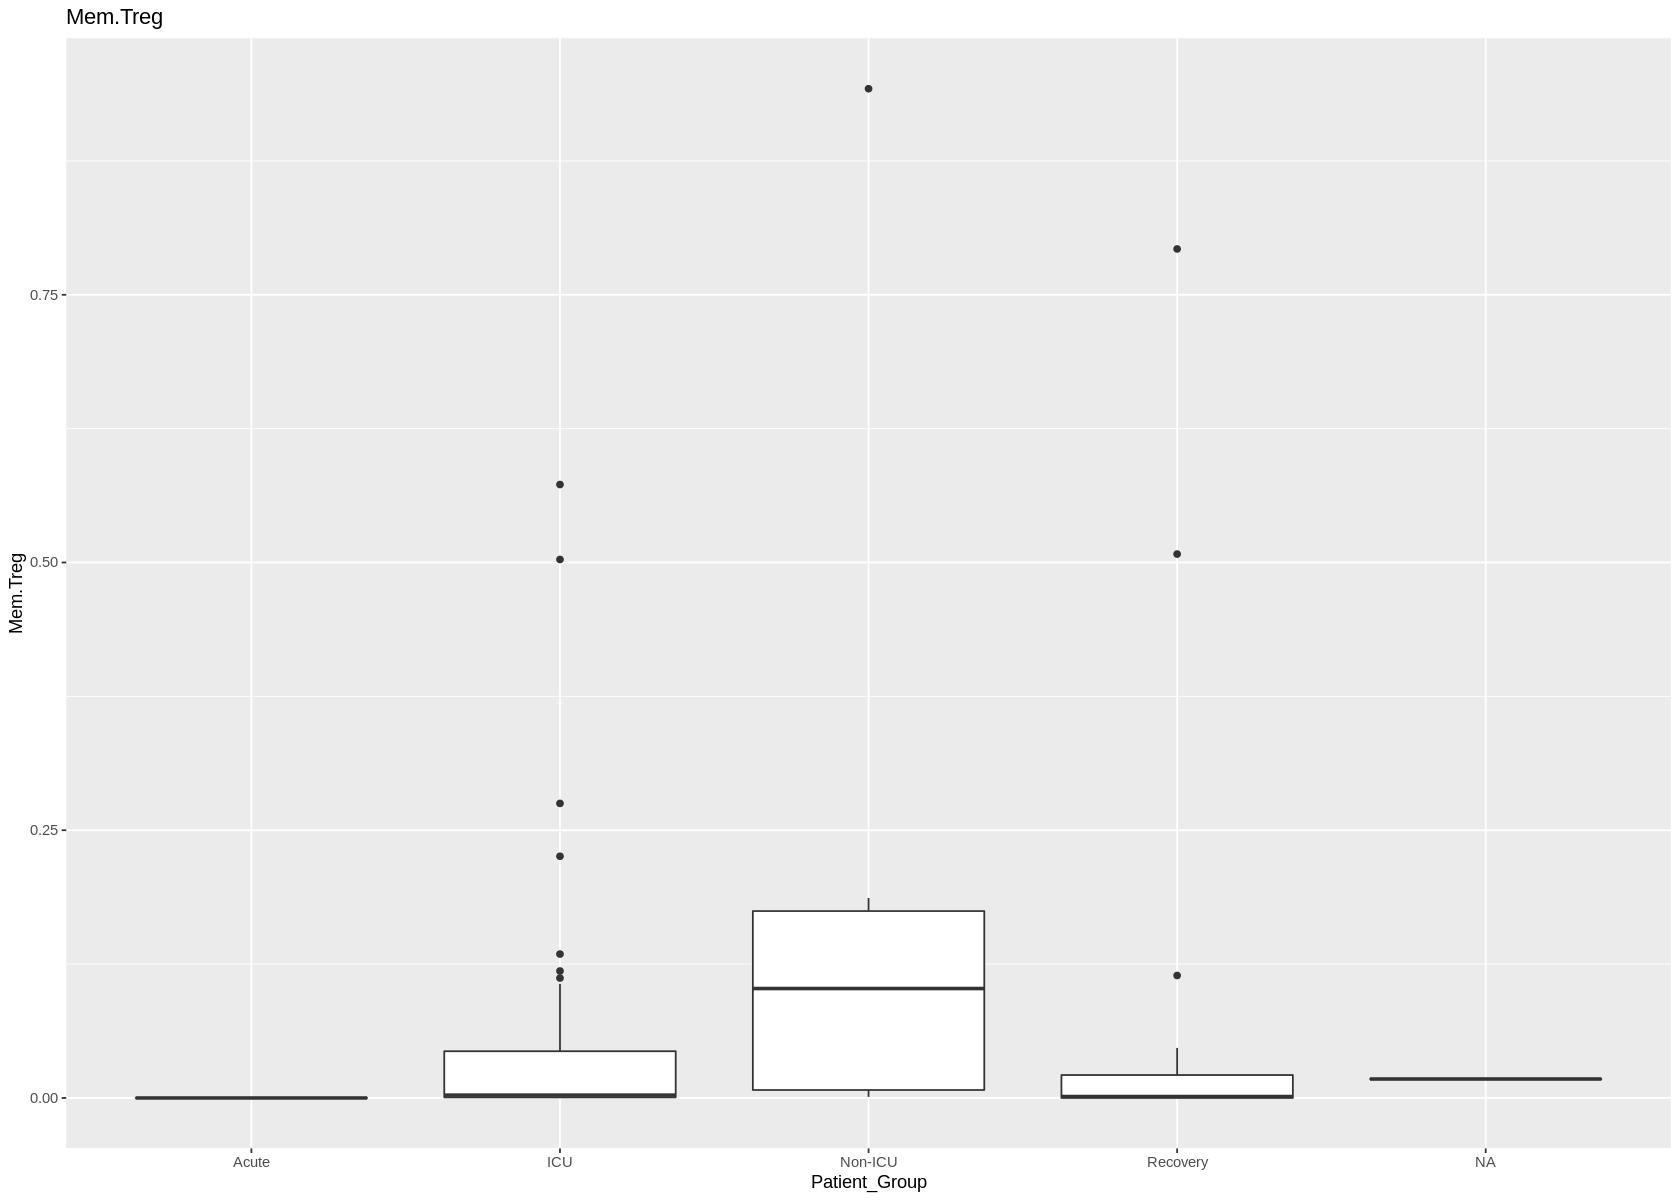

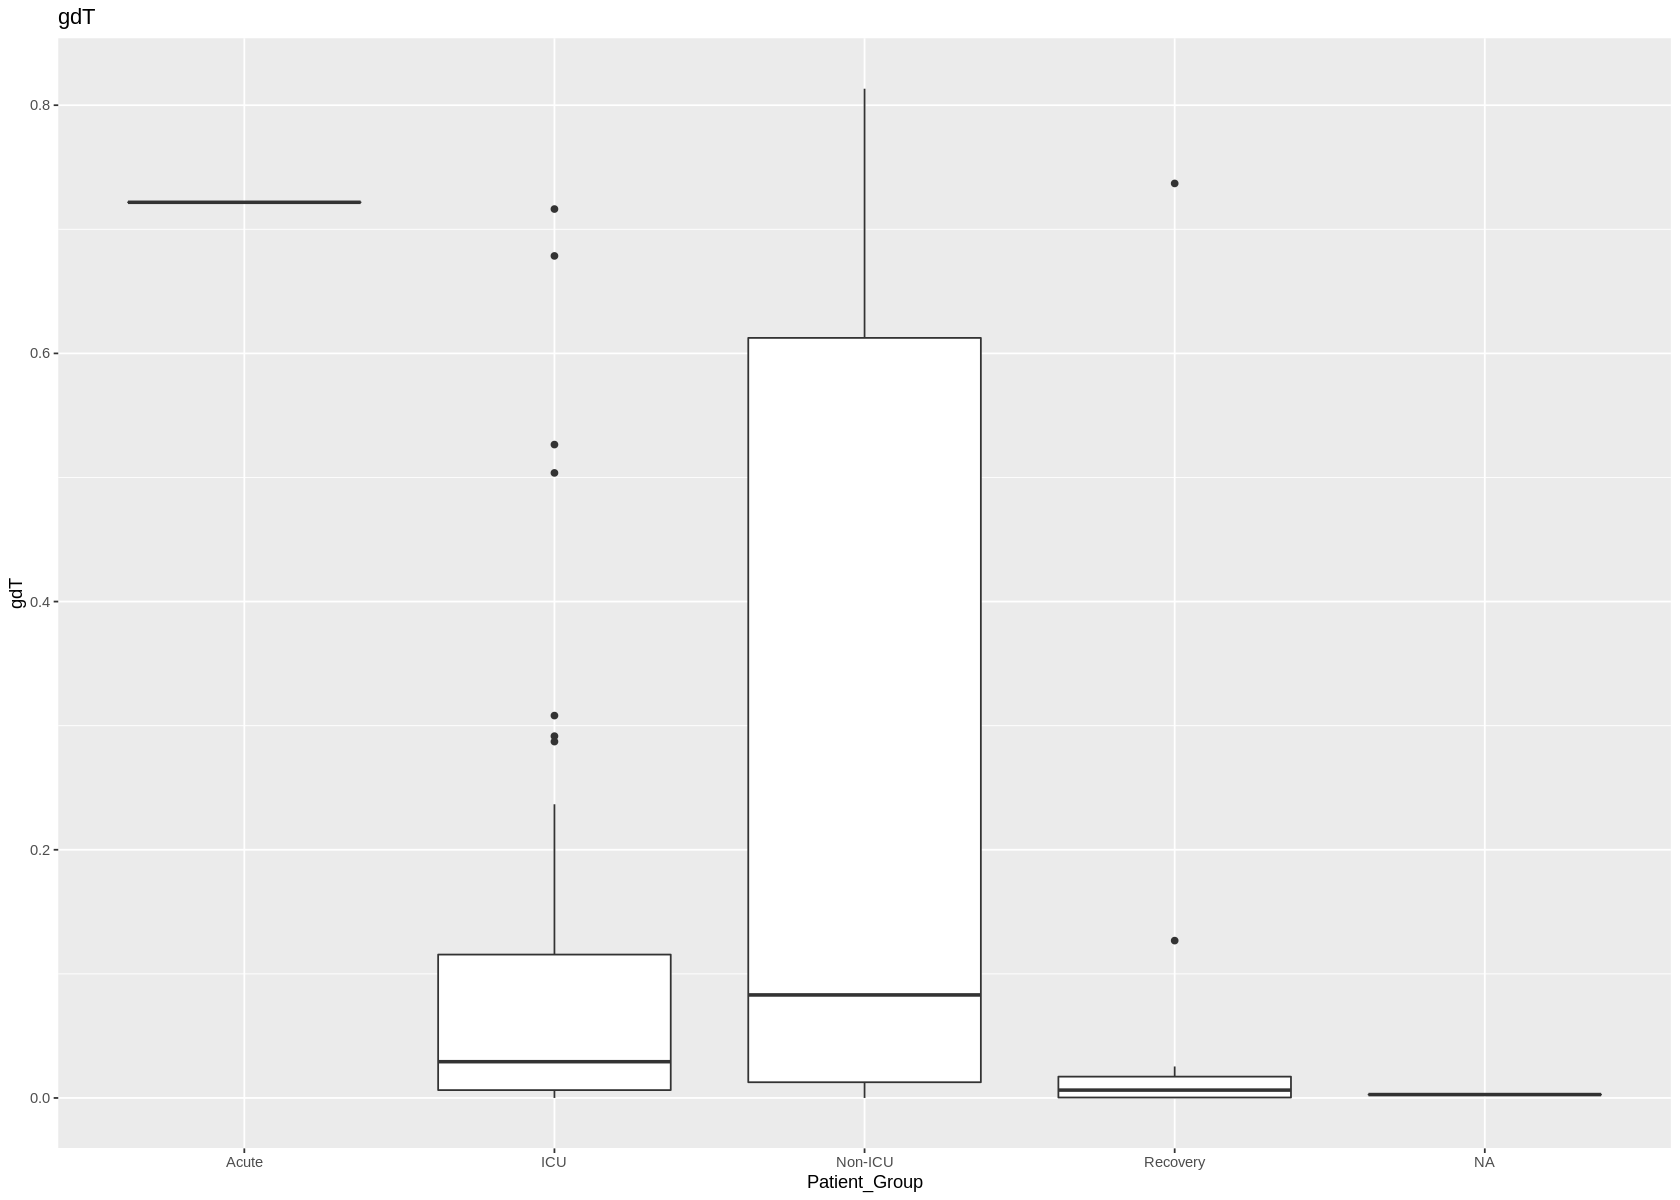

In [131]:
ggplot(metadata_prop, aes(x=Patient_Group, y=CD8.T)) + 
    geom_boxplot()+ ggtitle("CD8.T")
ggplot(metadata_prop, aes(x=Patient_Group, y=CD4.T)) + 
    geom_boxplot()+ ggtitle("CD4.T")
ggplot(metadata_prop, aes(x=Patient_Group, y=Mem.Treg)) + 
    geom_boxplot()+ ggtitle("Mem.Treg")
ggplot(metadata_prop, aes(x=Patient_Group, y=gdT)) + 
    geom_boxplot()+ ggtitle("gdT")

In [124]:
colnames(A0)

[1] "CD8.T"            "CD4.T"            "Mem.Treg"         "CD39.Mem.Treg"   
 [5] "Naive.Treg"       "gdT"              "Naive.B"          "Memory.B"        
 [9] "Plasmablast"      "NK"               "pDC"              "mDC"             
[13] "Monocyte"         "Eosinophil"       "Neutrophil"       "MAIT"            
[17] "CD16..Basophil"   "CD16..Basophil.1"

In [126]:
table(metadata_prop$Patient_Group)


   Acute      ICU  Non-ICU Recovery 
       1       43        7       19 

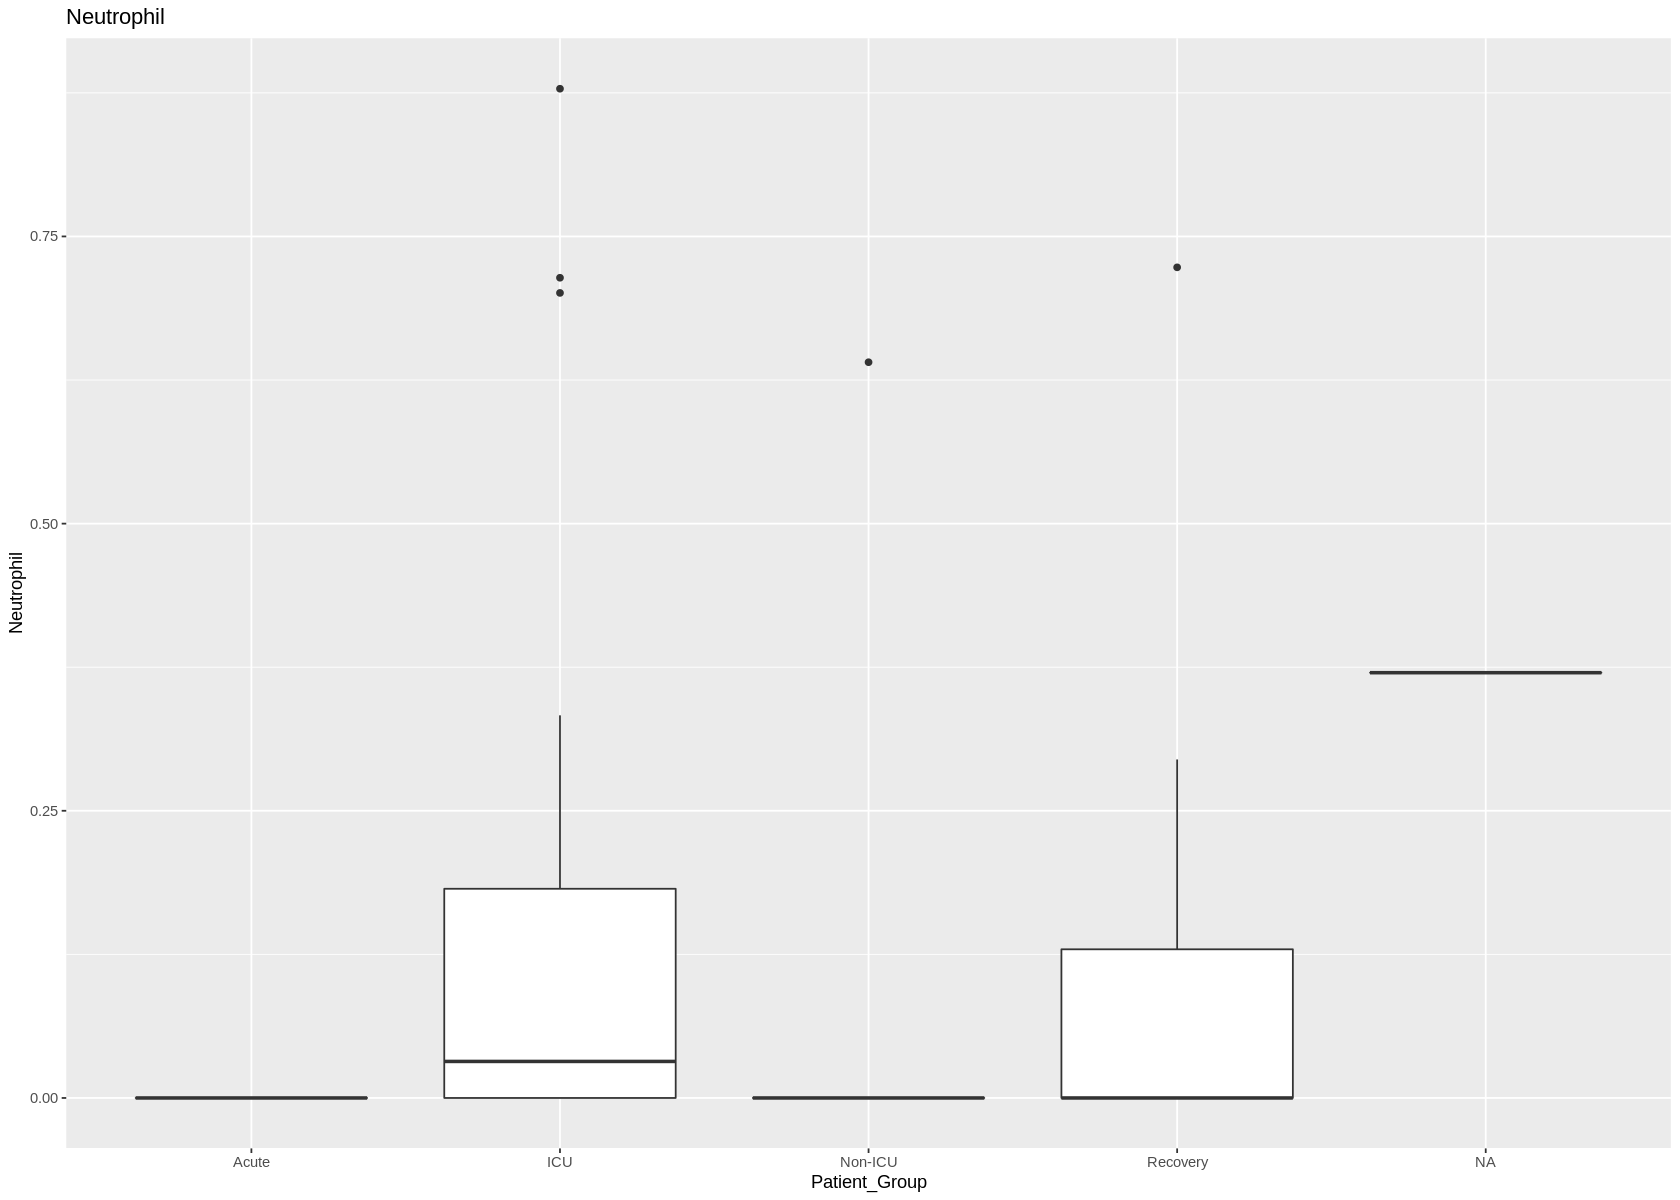

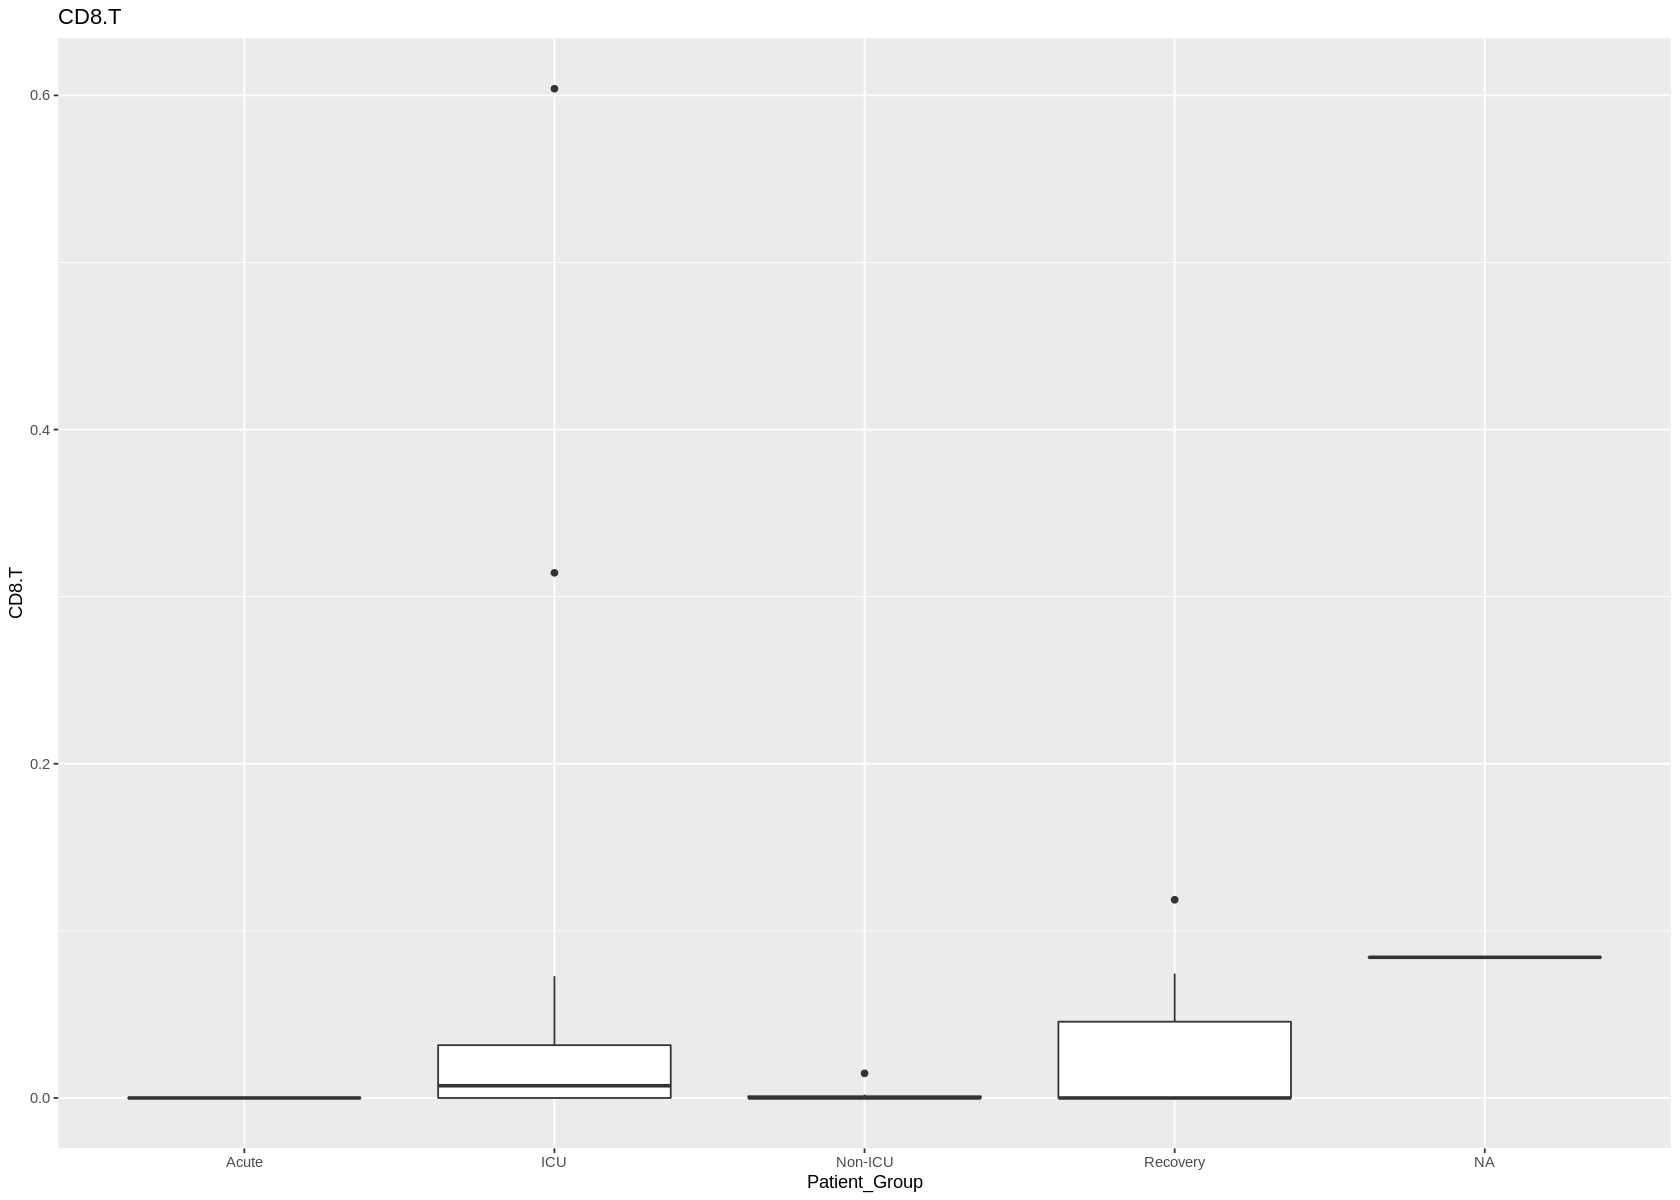

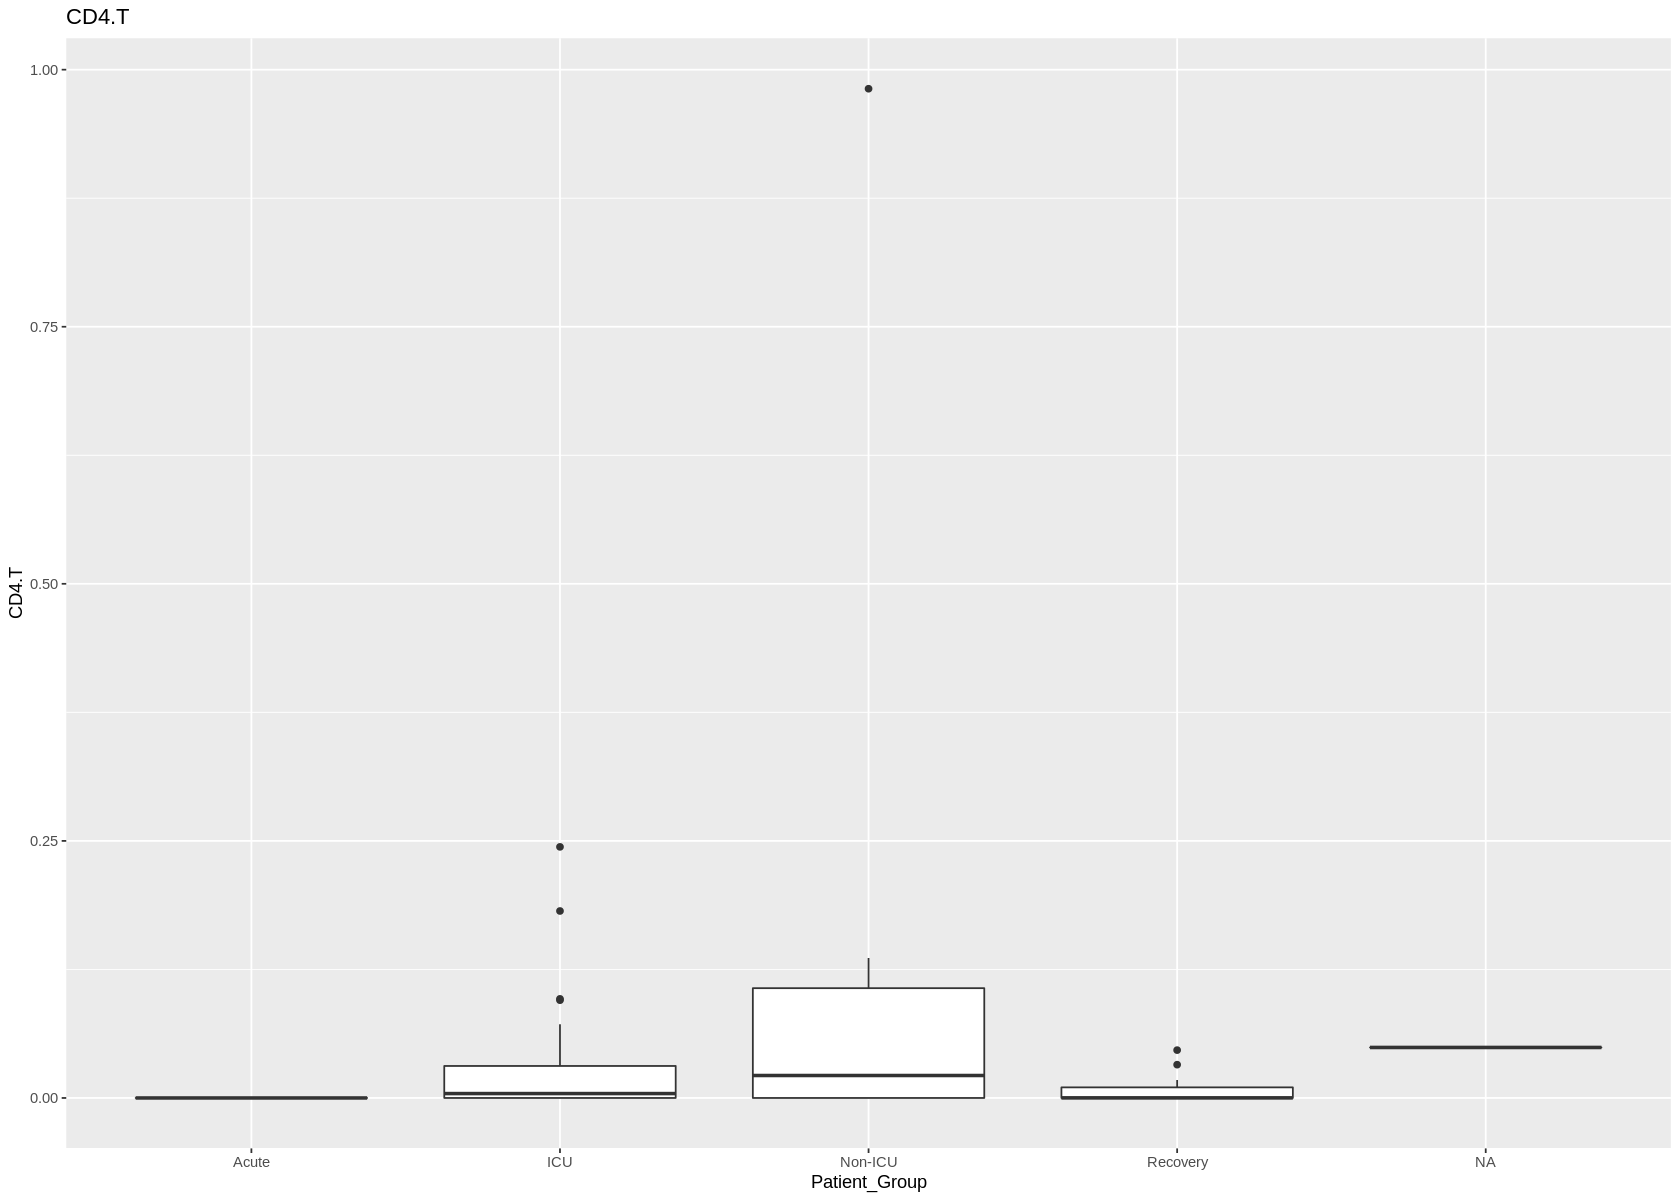

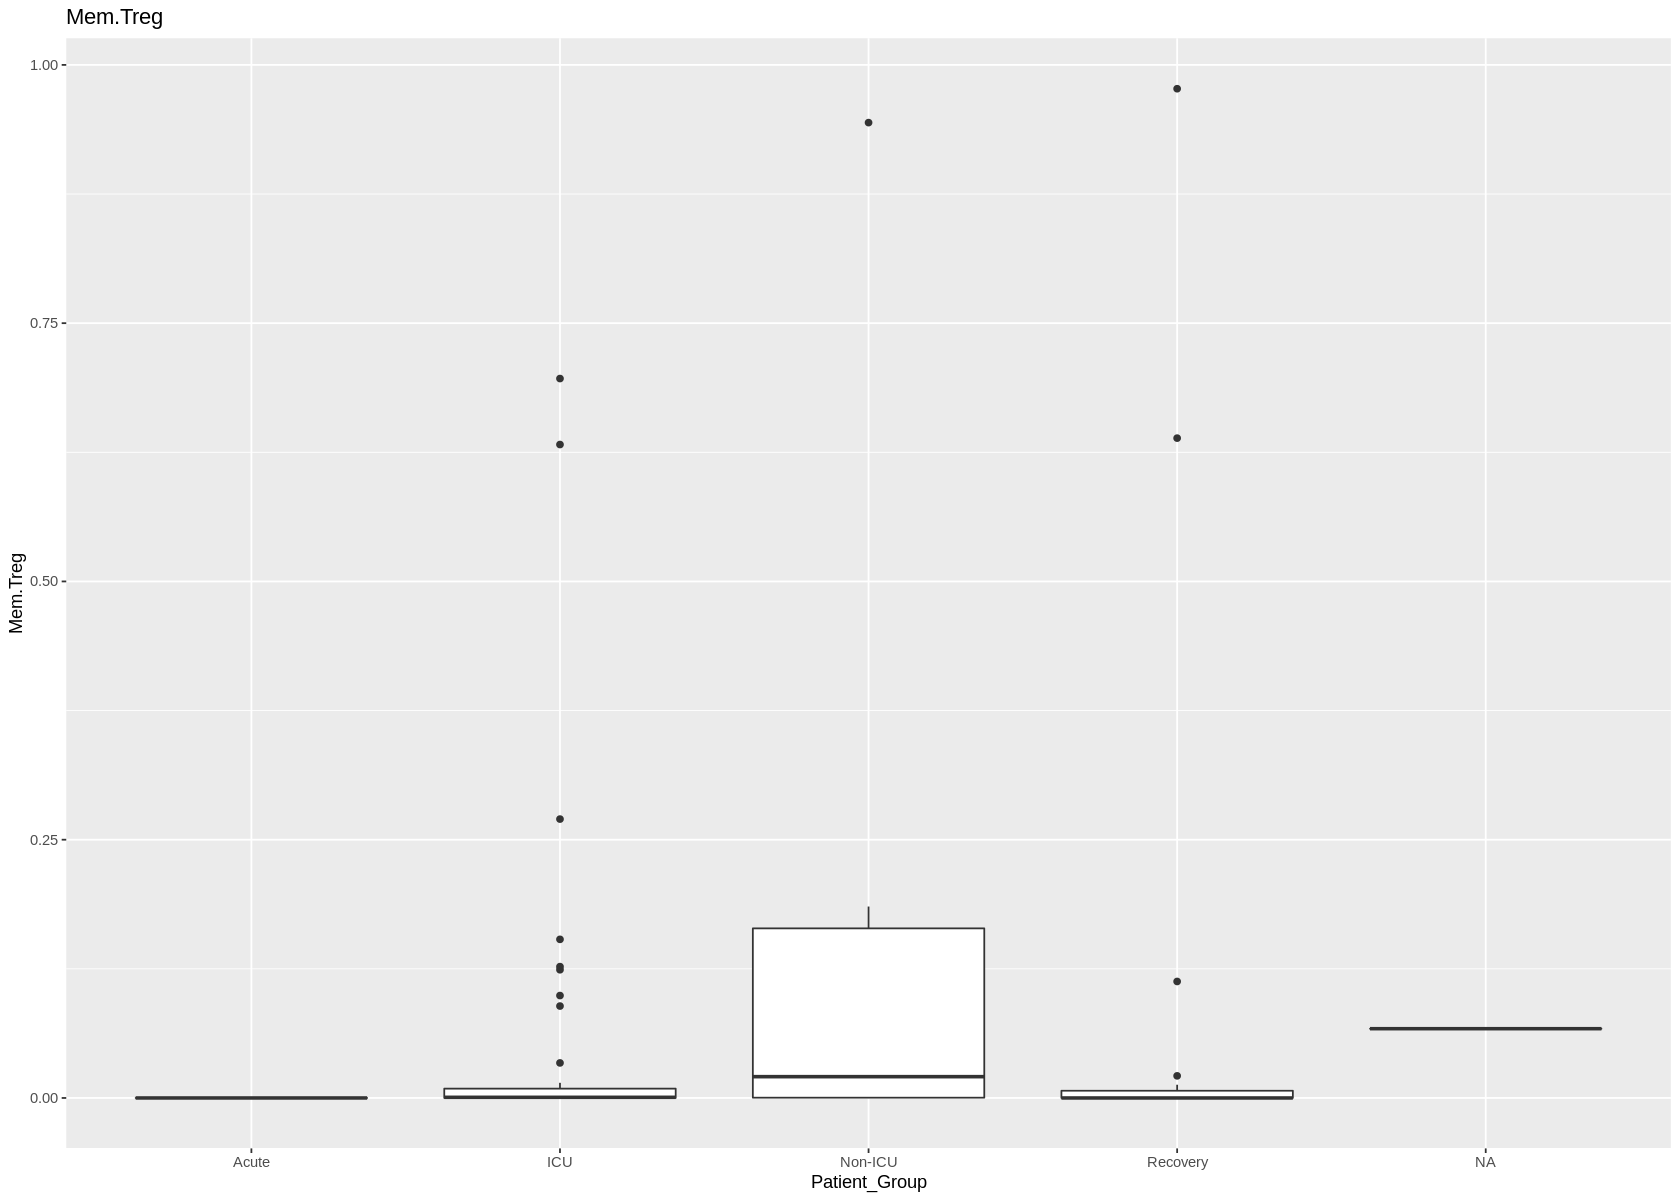

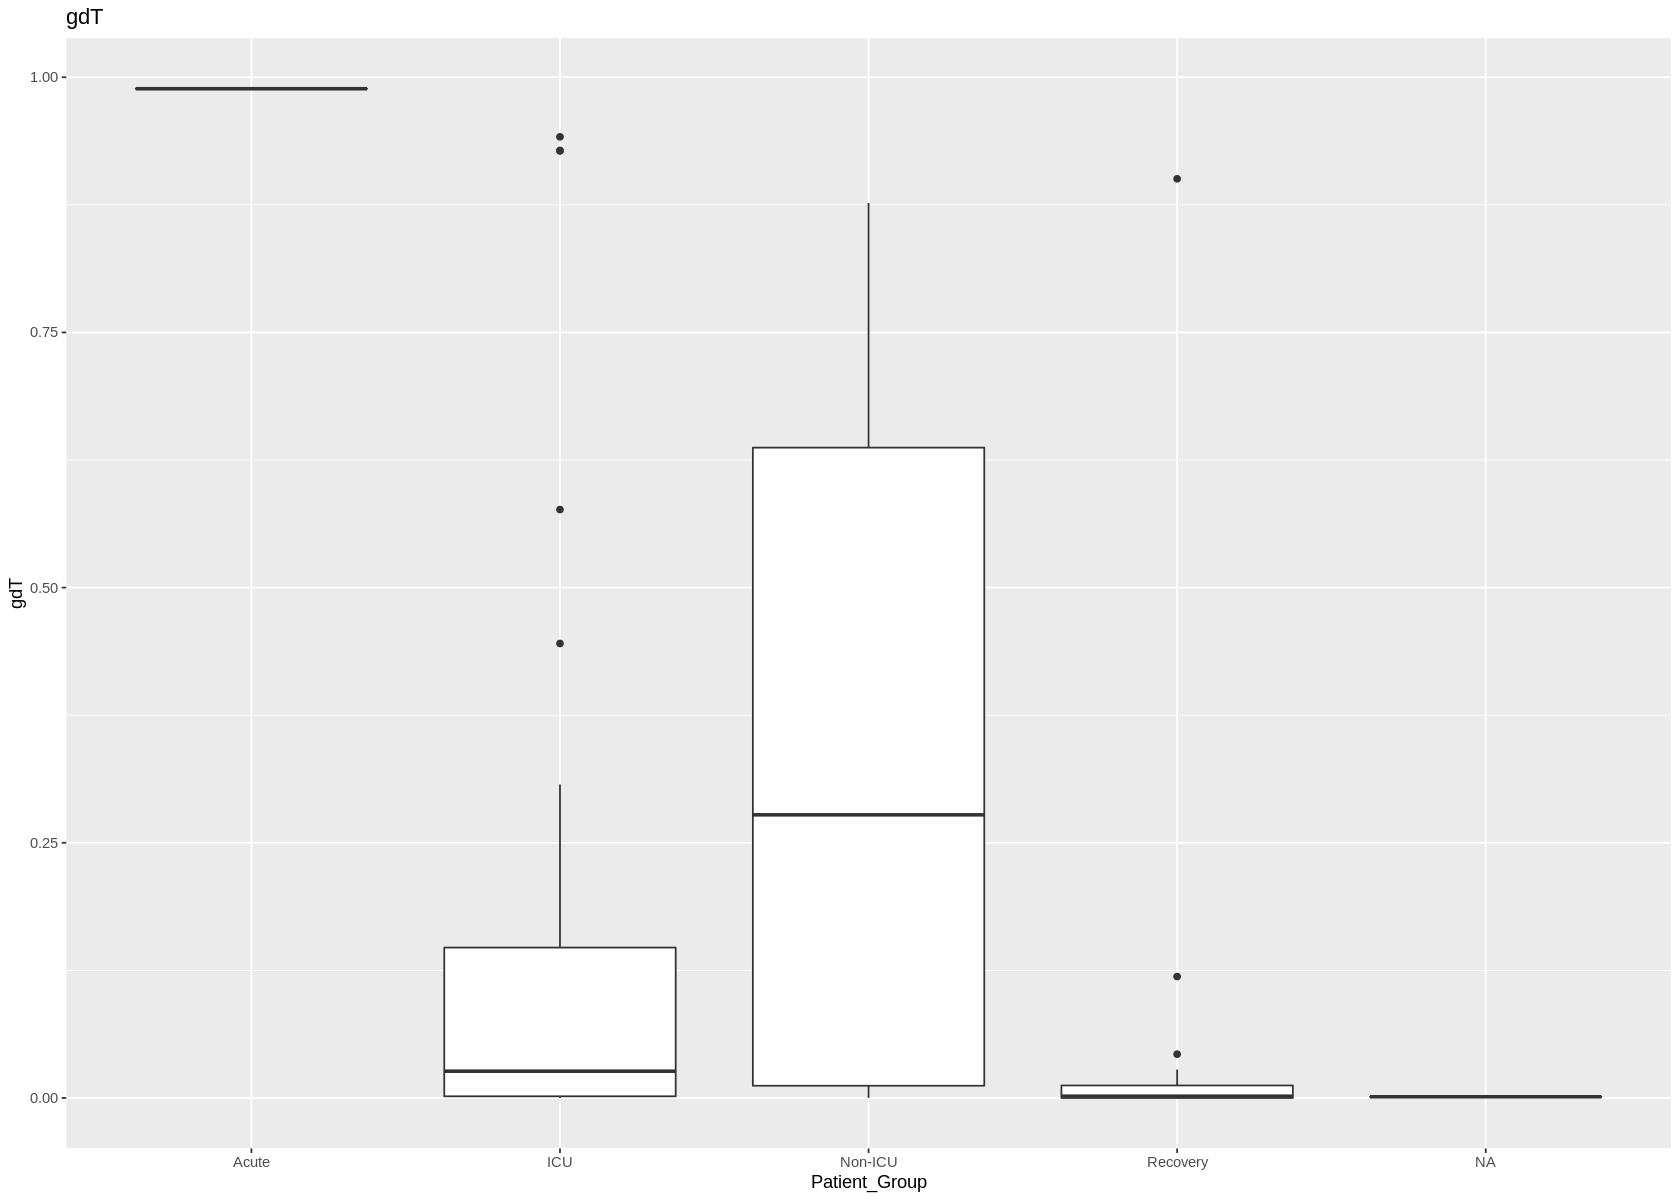

In [144]:
ggplot(metadata_prop_sub, aes(x=Patient_Group, y=Neutrophil)) + 
    geom_boxplot()+ ggtitle("Neutrophil")
ggplot(metadata_prop_sub, aes(x=Patient_Group, y=CD8.T)) + 
    geom_boxplot()+ ggtitle("CD8.T")
ggplot(metadata_prop_sub, aes(x=Patient_Group, y=CD4.T)) + 
    geom_boxplot()+ ggtitle("CD4.T")
ggplot(metadata_prop_sub, aes(x=Patient_Group, y=Mem.Treg)) + 
    geom_boxplot()+ ggtitle("Mem.Treg")
ggplot(metadata_prop_sub, aes(x=Patient_Group, y=gdT)) + 
    geom_boxplot()+ ggtitle("gdT")

`geom_smooth()` using formula 'y ~ x'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 4”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at 4”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 2”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“reciprocal condition number  

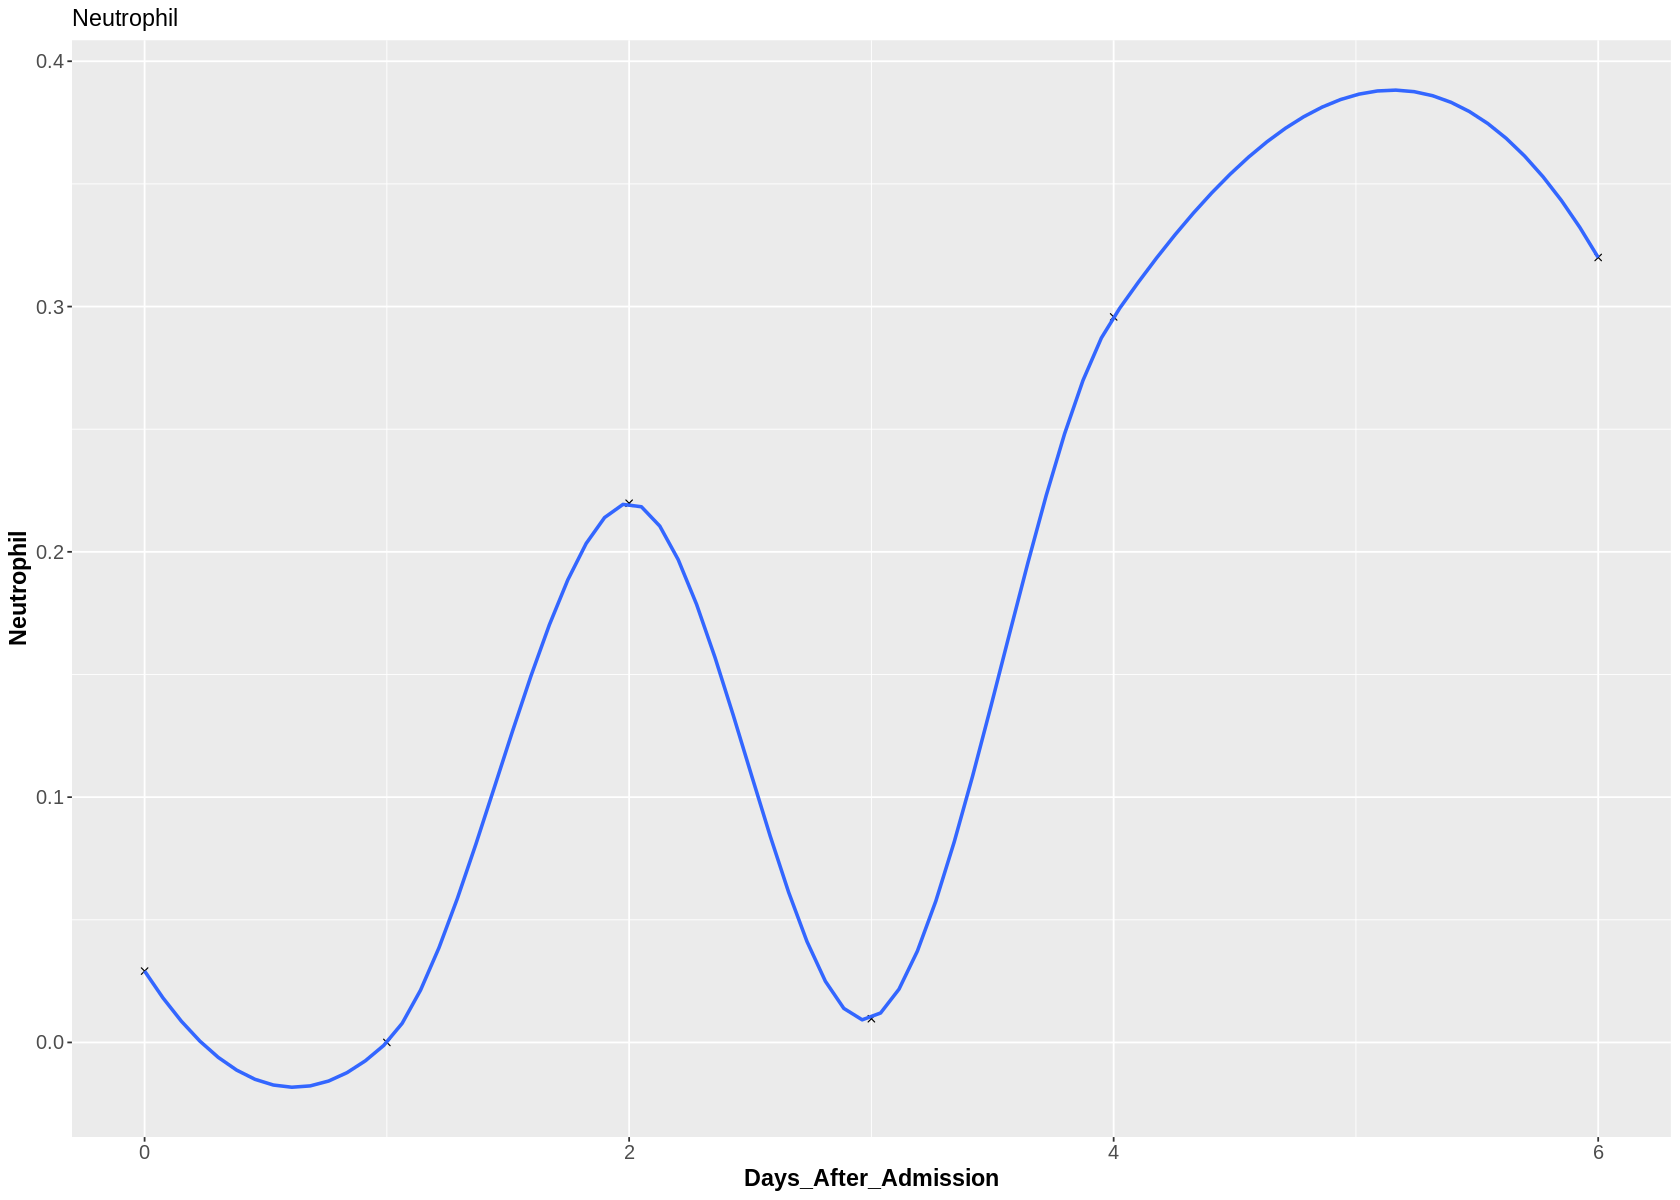

`geom_smooth()` using formula 'y ~ x'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 4”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at 4”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 2”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“reciprocal condition number  

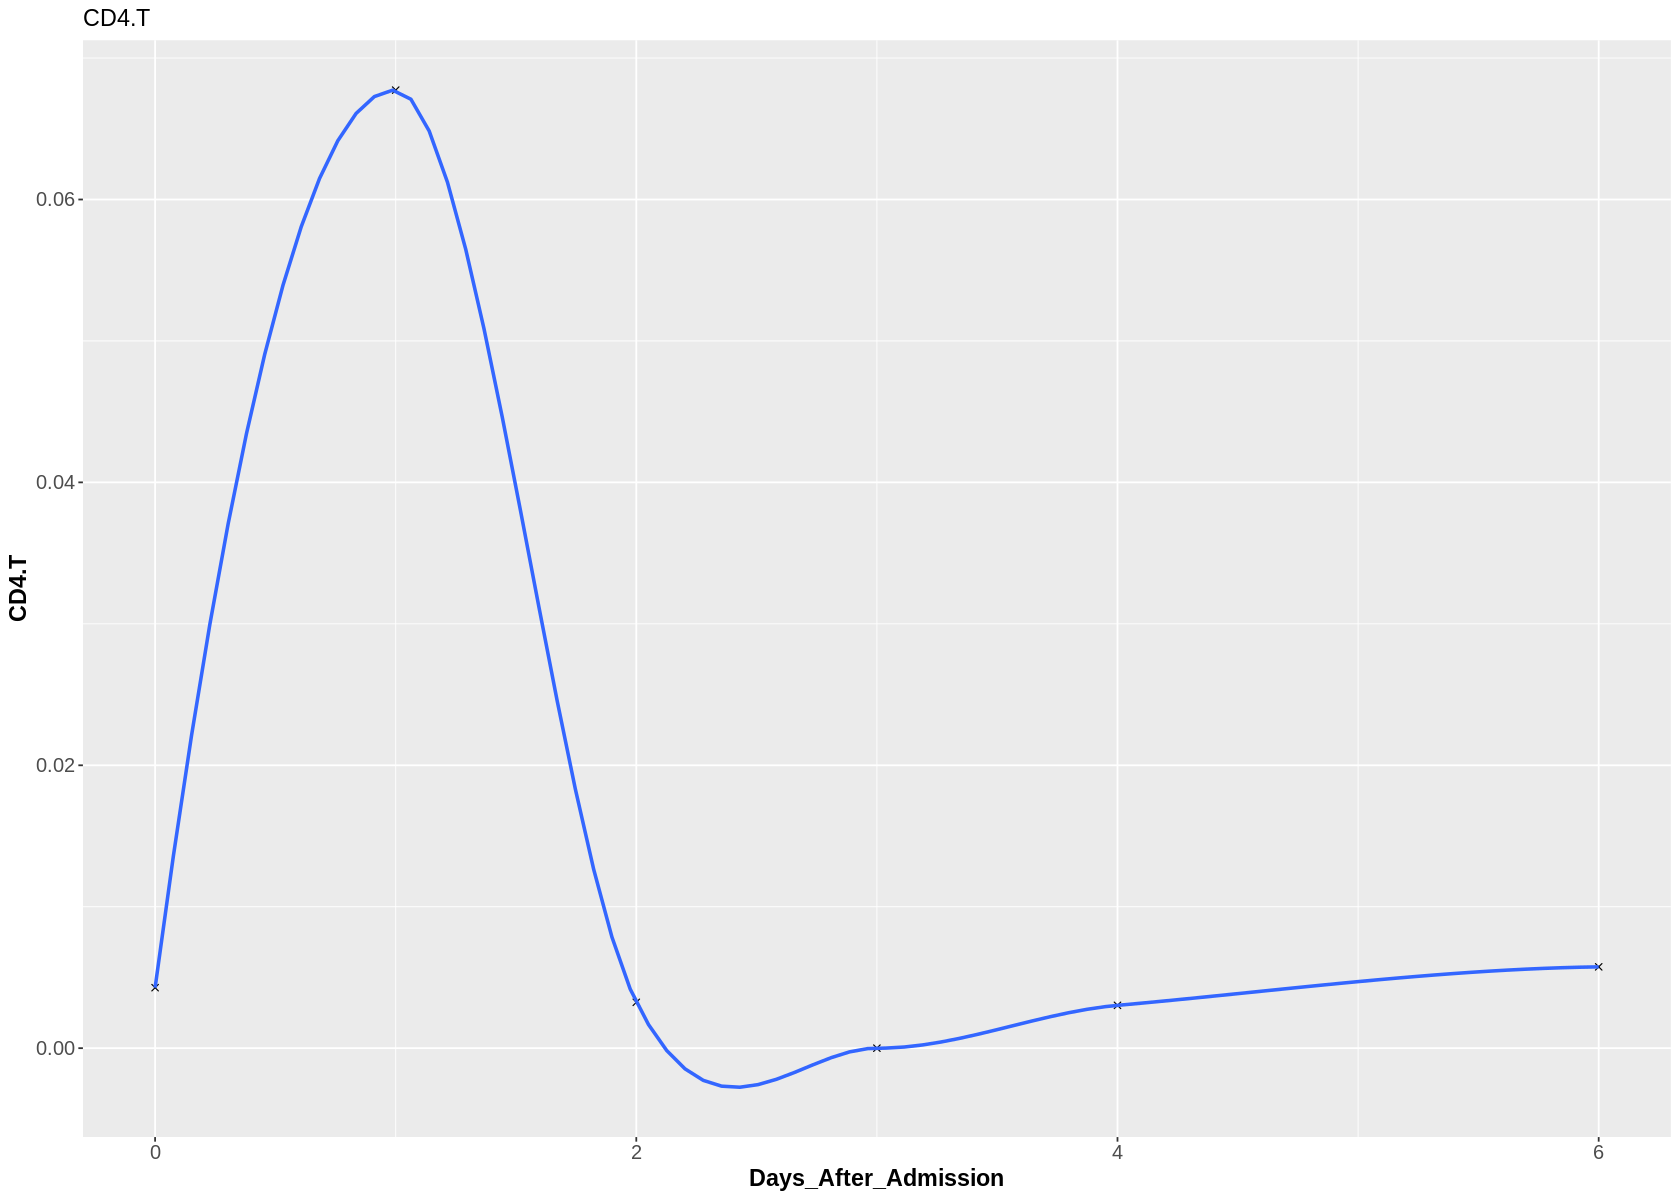

`geom_smooth()` using formula 'y ~ x'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 4”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at 4”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 2”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“reciprocal condition number  

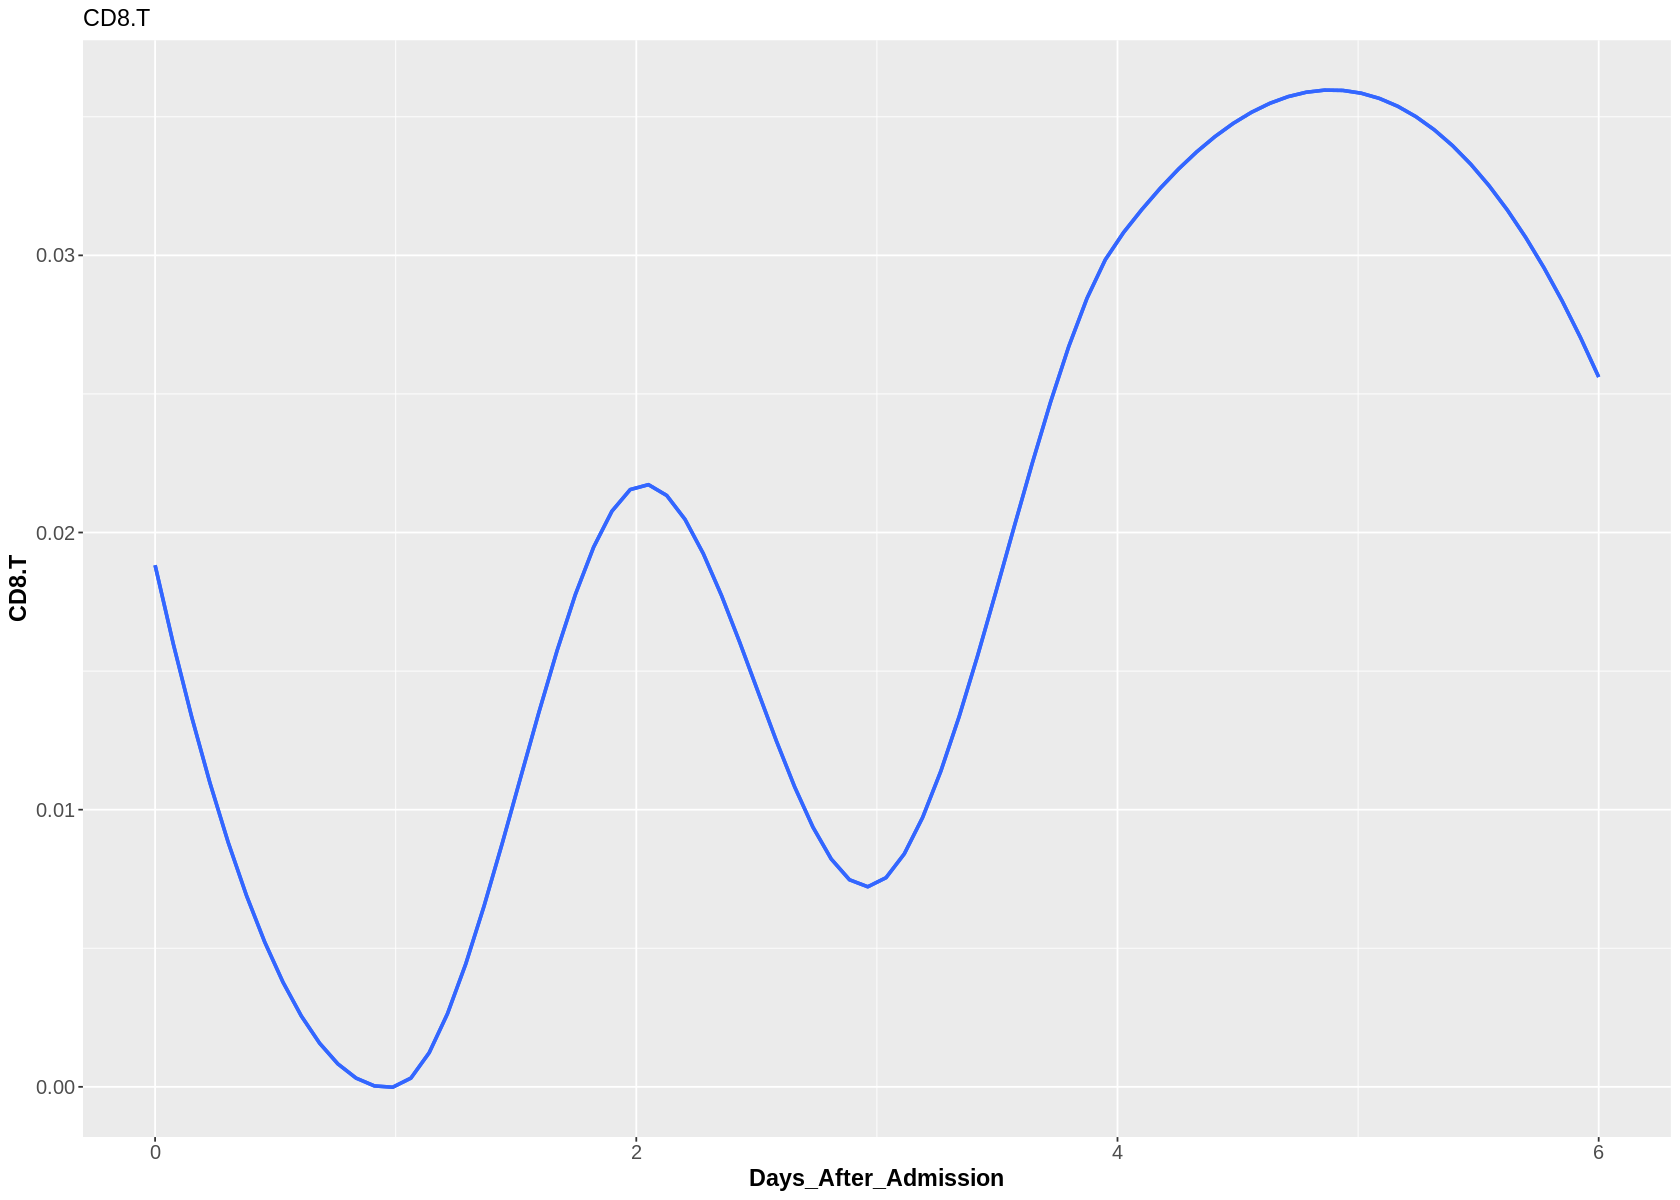

`geom_smooth()` using formula 'y ~ x'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 4”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at 4”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 2”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“reciprocal condition number  

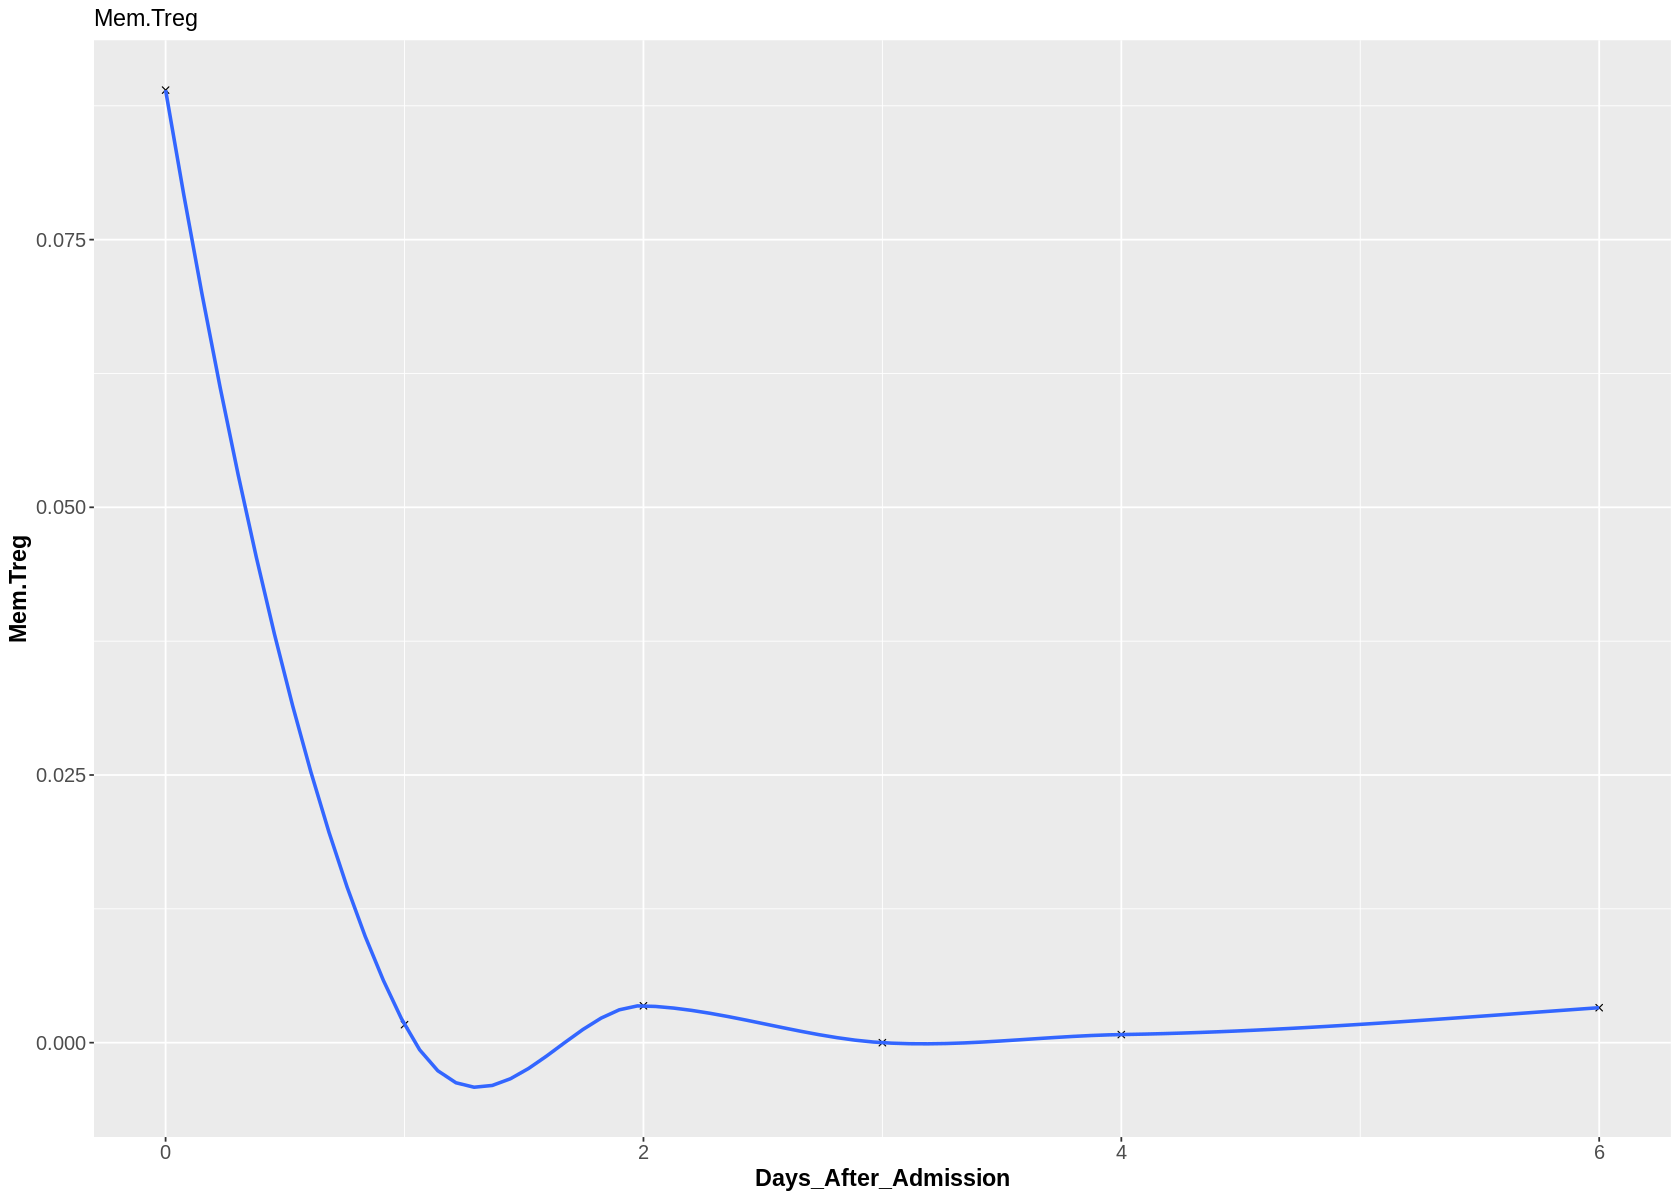

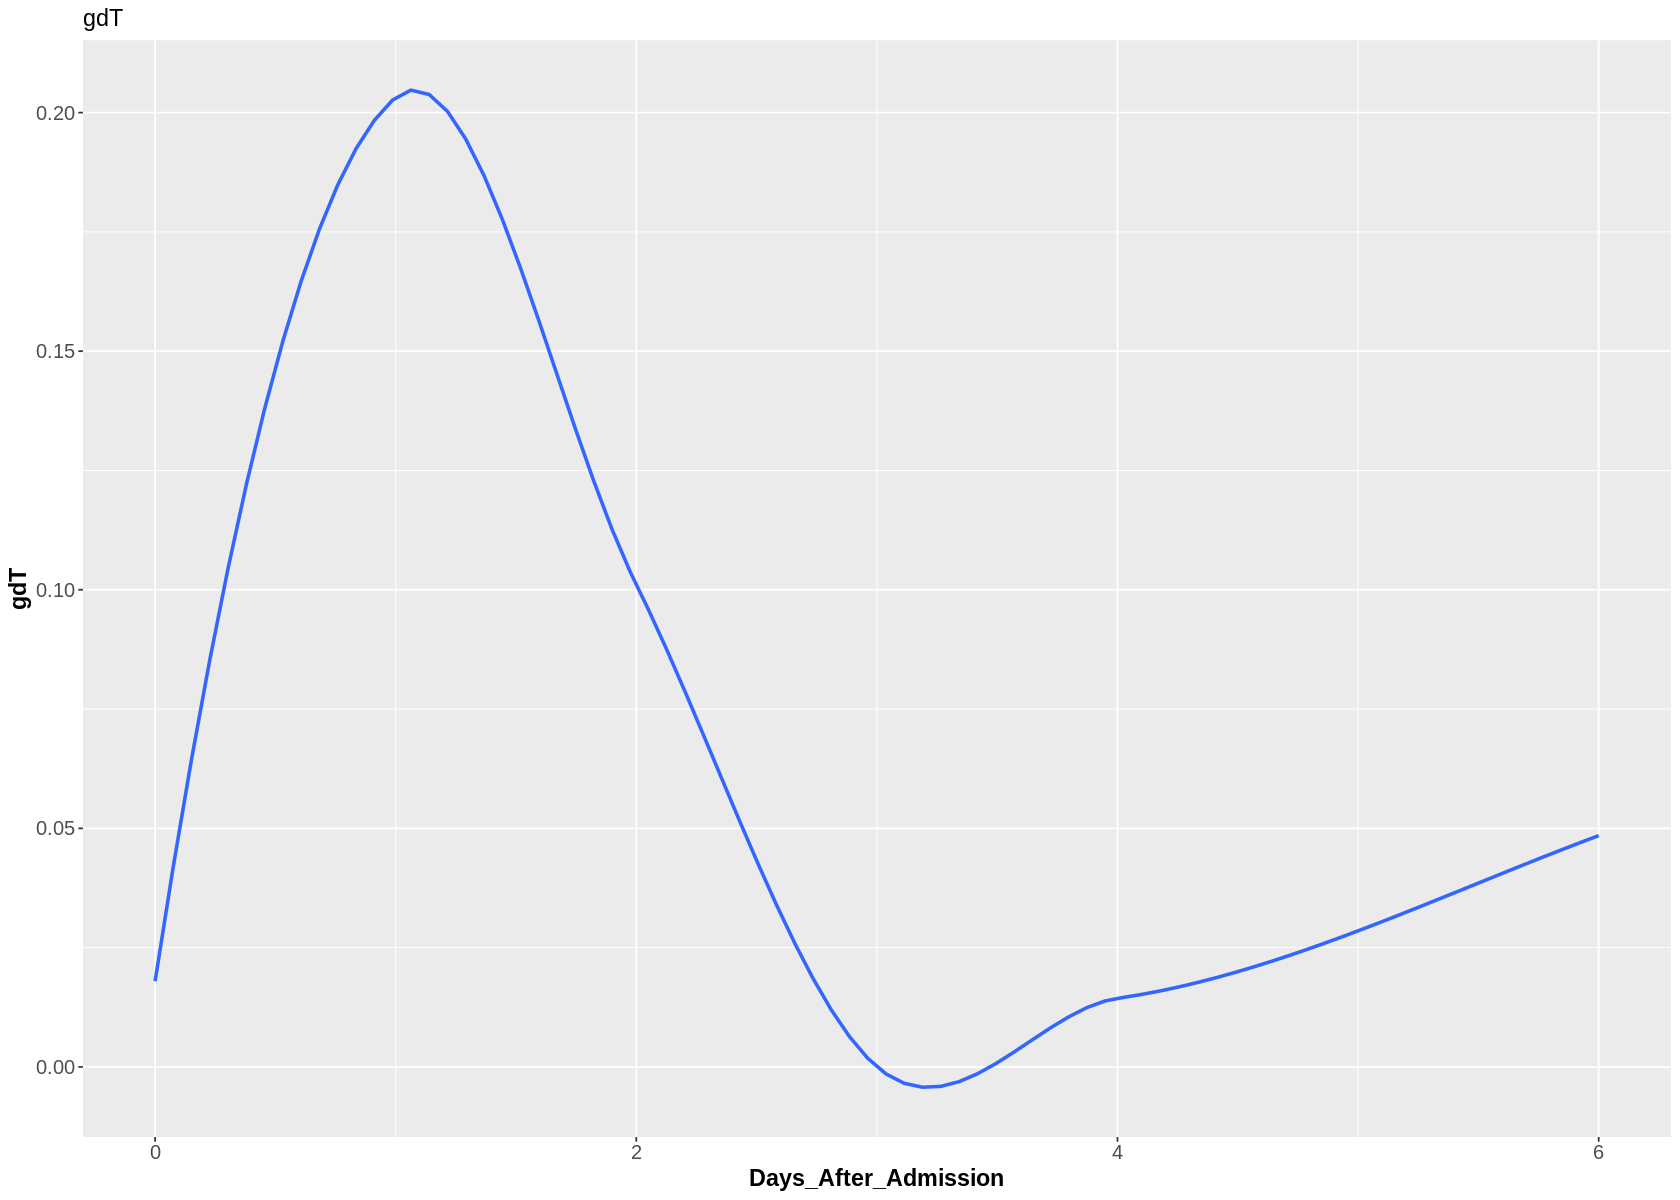

In [176]:
## temporal
metadata_prop_sub_26 <- metadata_prop_sub[metadata_prop_sub$Subject.ID %in% "COV-26",]
ggplot(metadata_prop_sub_26, aes(Days_After_Admission,Neutrophil)) + 
geom_point(shape = 4) +
labs(x = 'Days_After_Admission', y = 'Neutrophil', title = "Neutrophil") + 
geom_smooth(method = "loess") +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

ggplot(metadata_prop_sub_26, aes(Days_After_Admission,CD4.T)) + 
geom_point(shape = 4) +
labs(x = 'Days_After_Admission', y = 'CD4.T', title = "CD4.T") + 
geom_smooth(method = "loess") +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

ggplot(metadata_prop_sub_26, aes(Days_After_Admission,CD8.T)) + 
geom_smooth(method = "loess") +
labs(x = 'Days_After_Admission', y = 'CD8.T', title = "CD8.T") + 
geom_smooth(method = "loess") +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

ggplot(metadata_prop_sub_26, aes(Days_After_Admission,Mem.Treg)) + 
geom_point(shape = 4) +
labs(x = 'Days_After_Admission', y = 'Mem.Treg', title = "Mem.Treg") + 
geom_smooth(method = "loess") +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

ggplot(metadata_prop_sub_26, aes(Days_After_Admission,gdT)) + 
geom_smooth(method = "loess") +
labs(x = 'Days_After_Admission', y = 'gdT', title = "gdT") + 
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


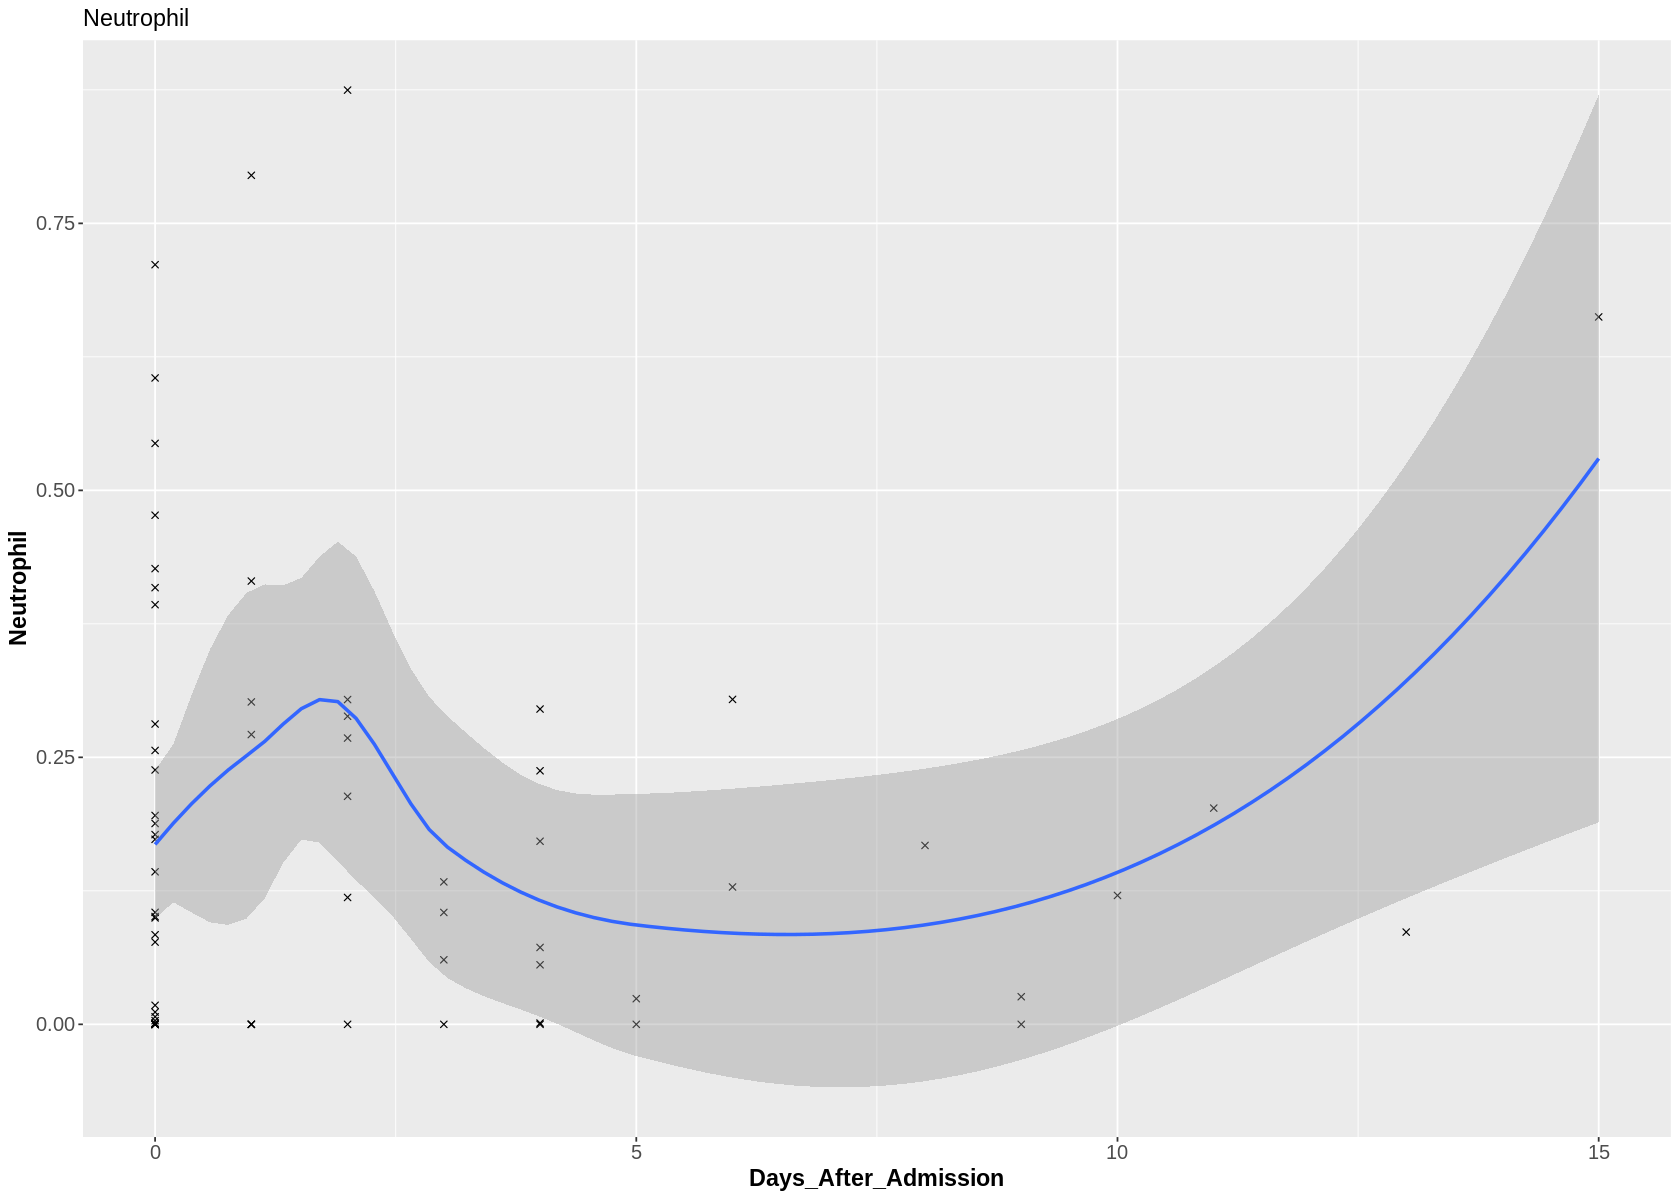

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”


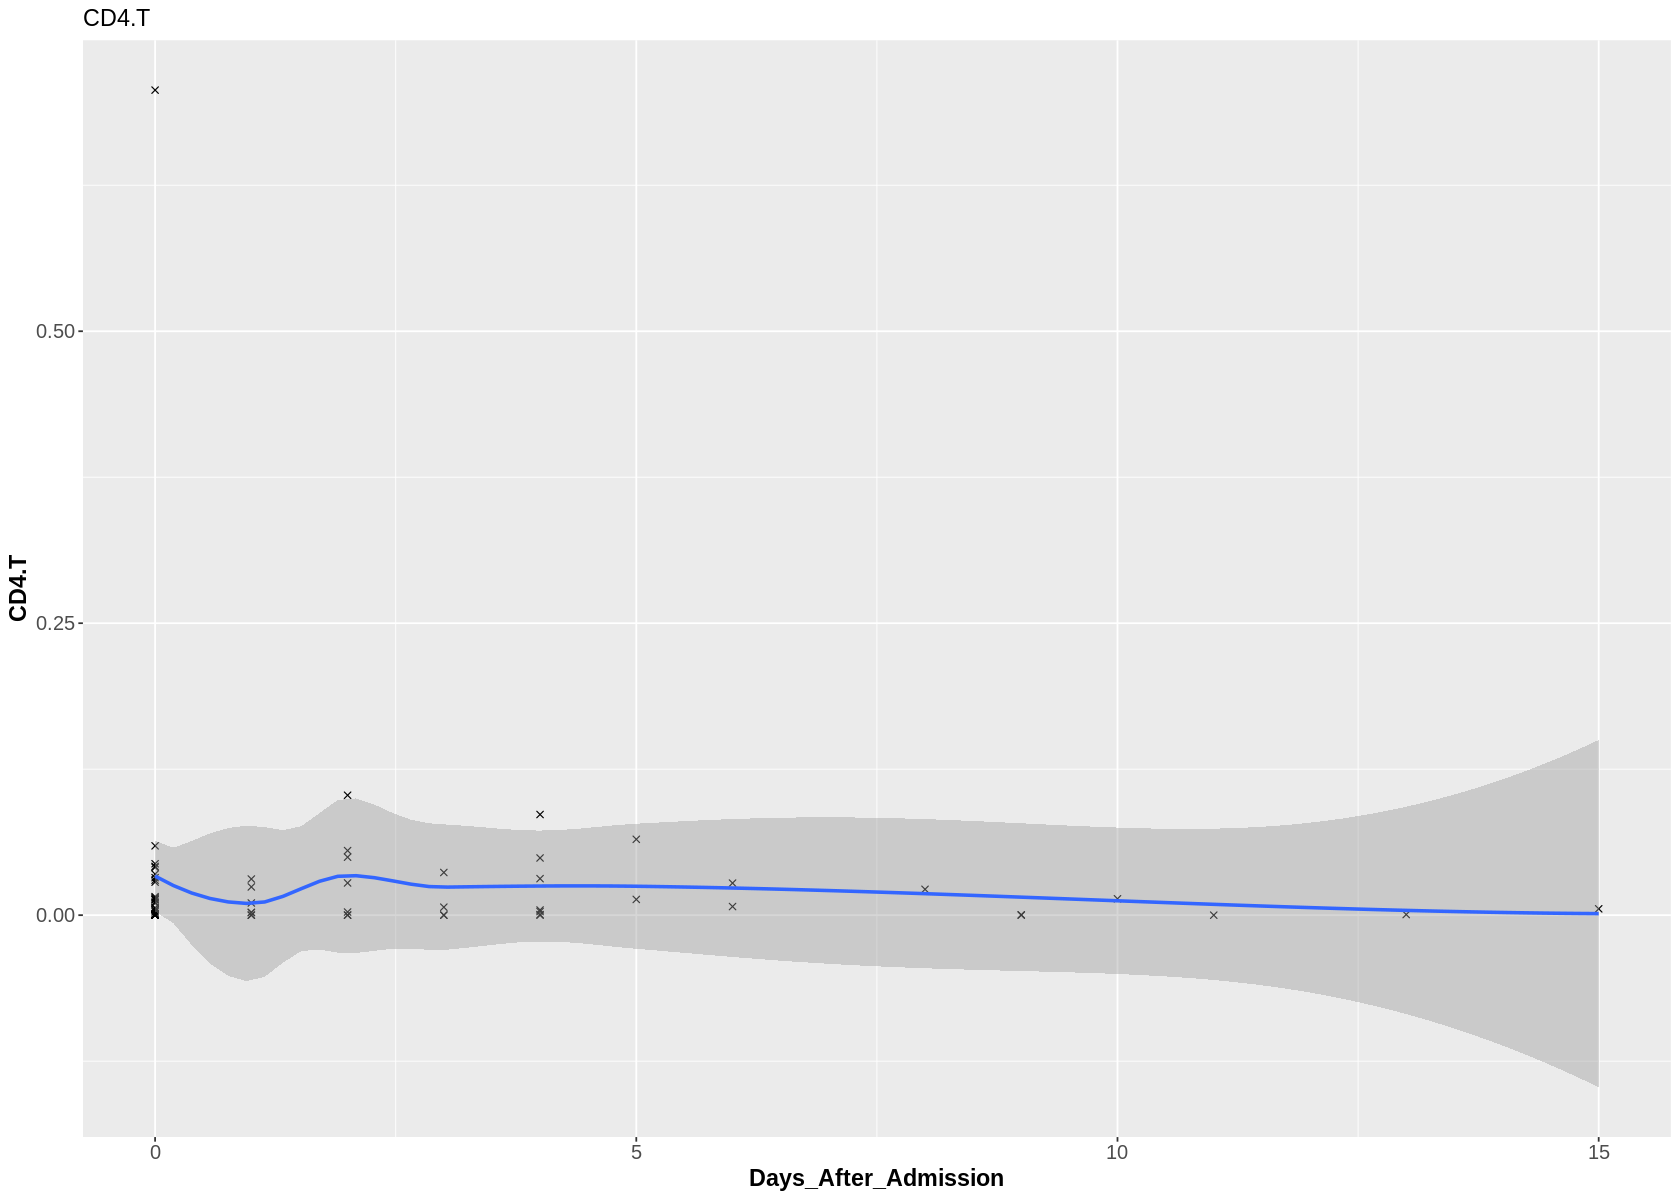

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


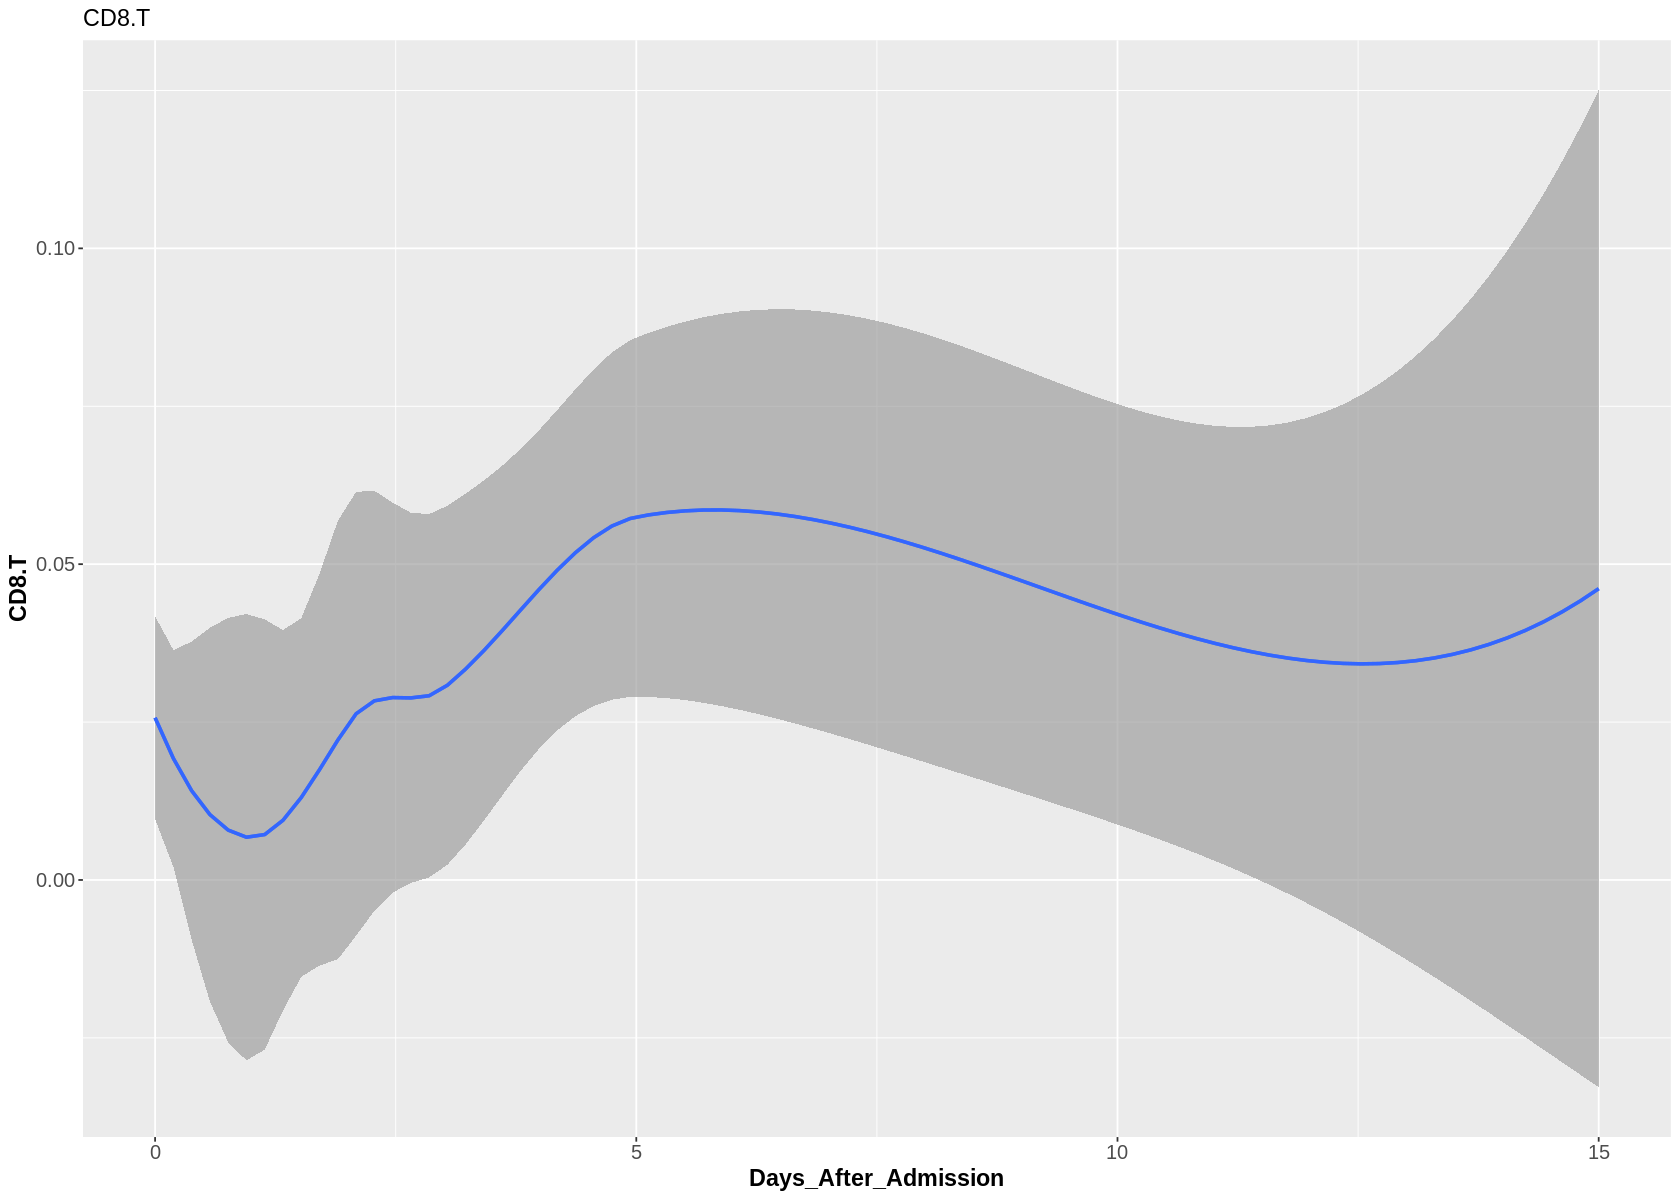

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”


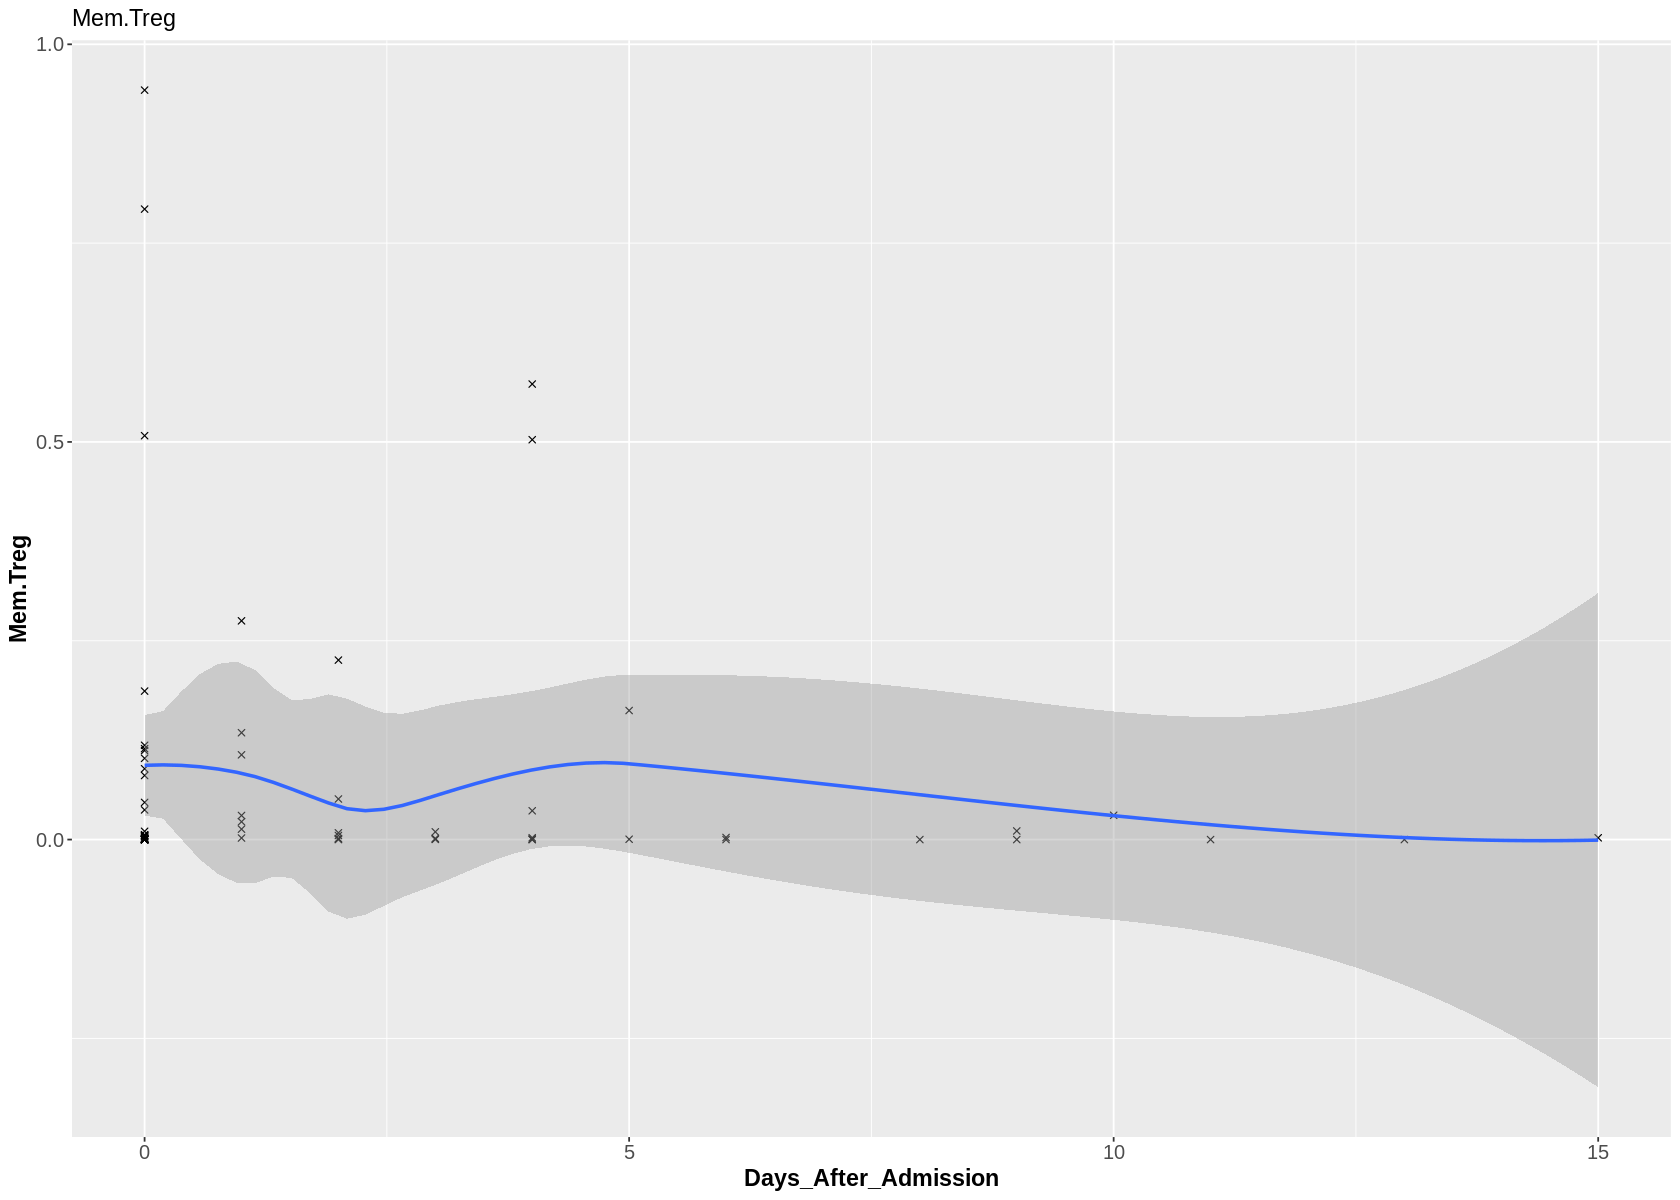

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”


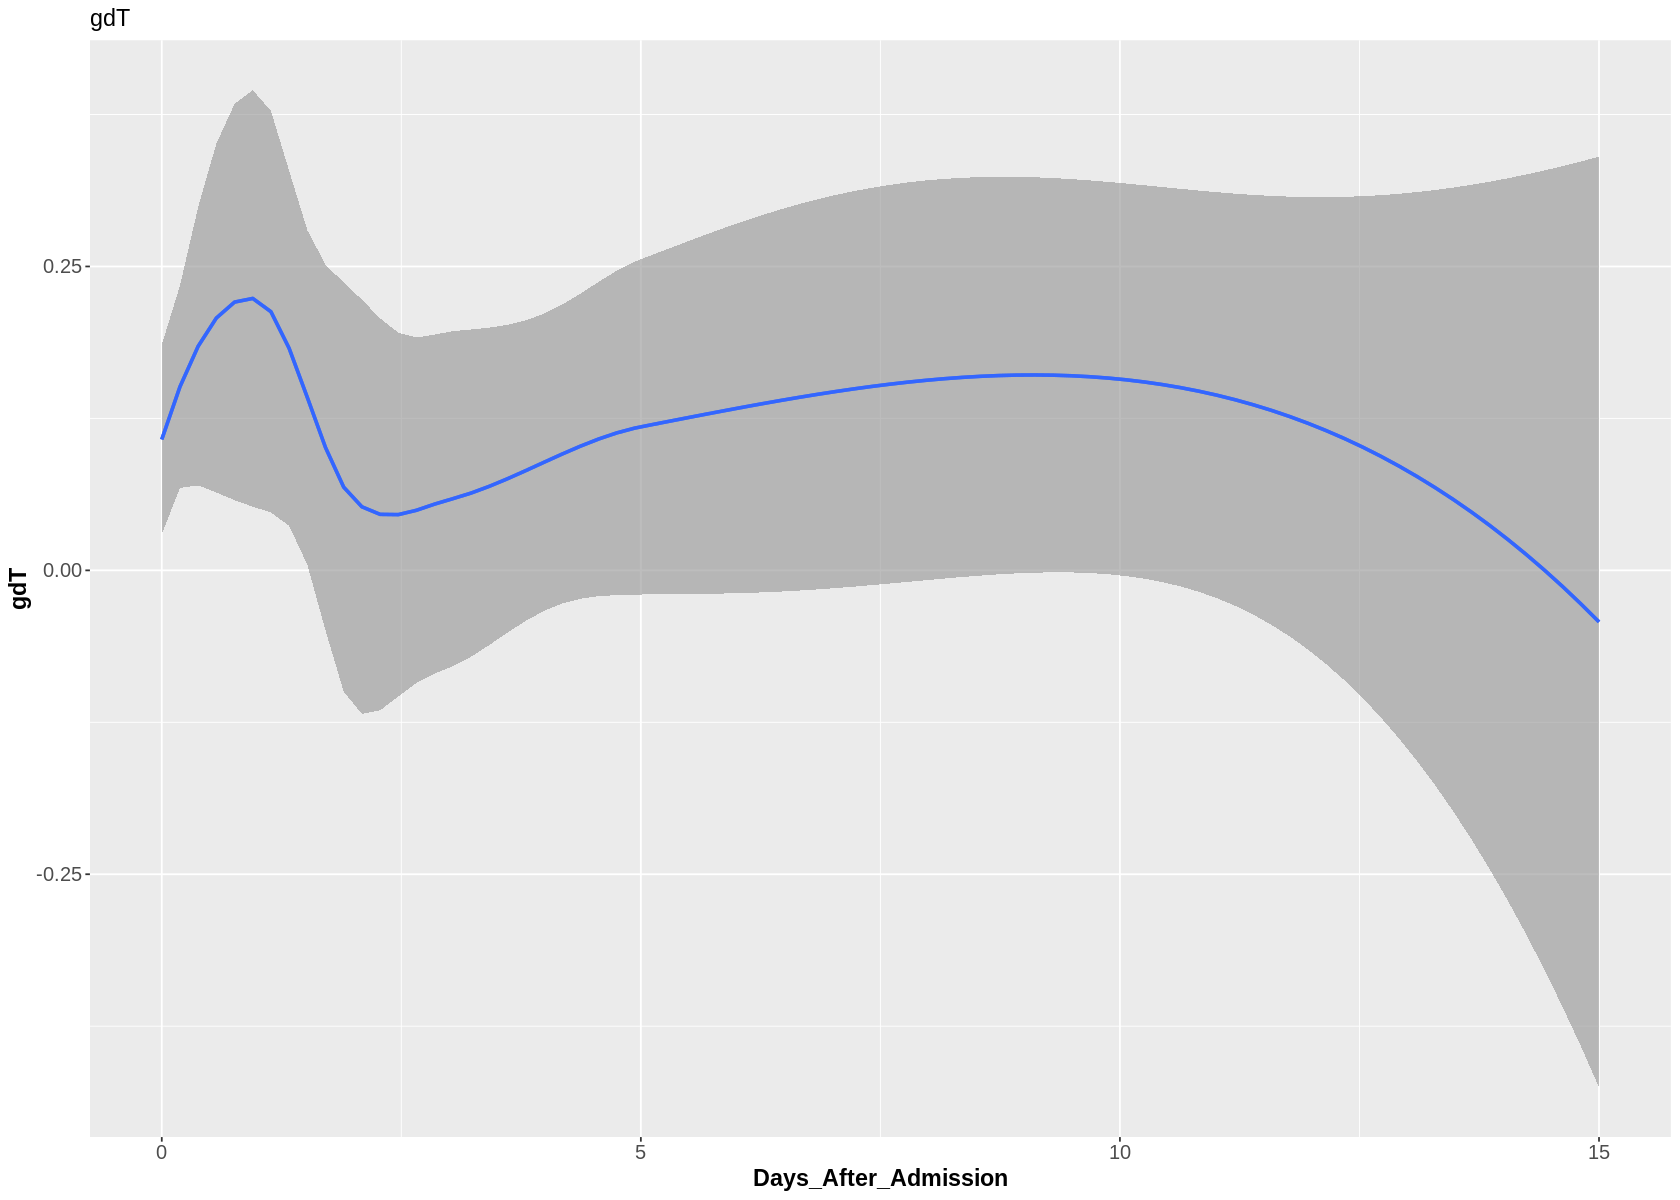

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”


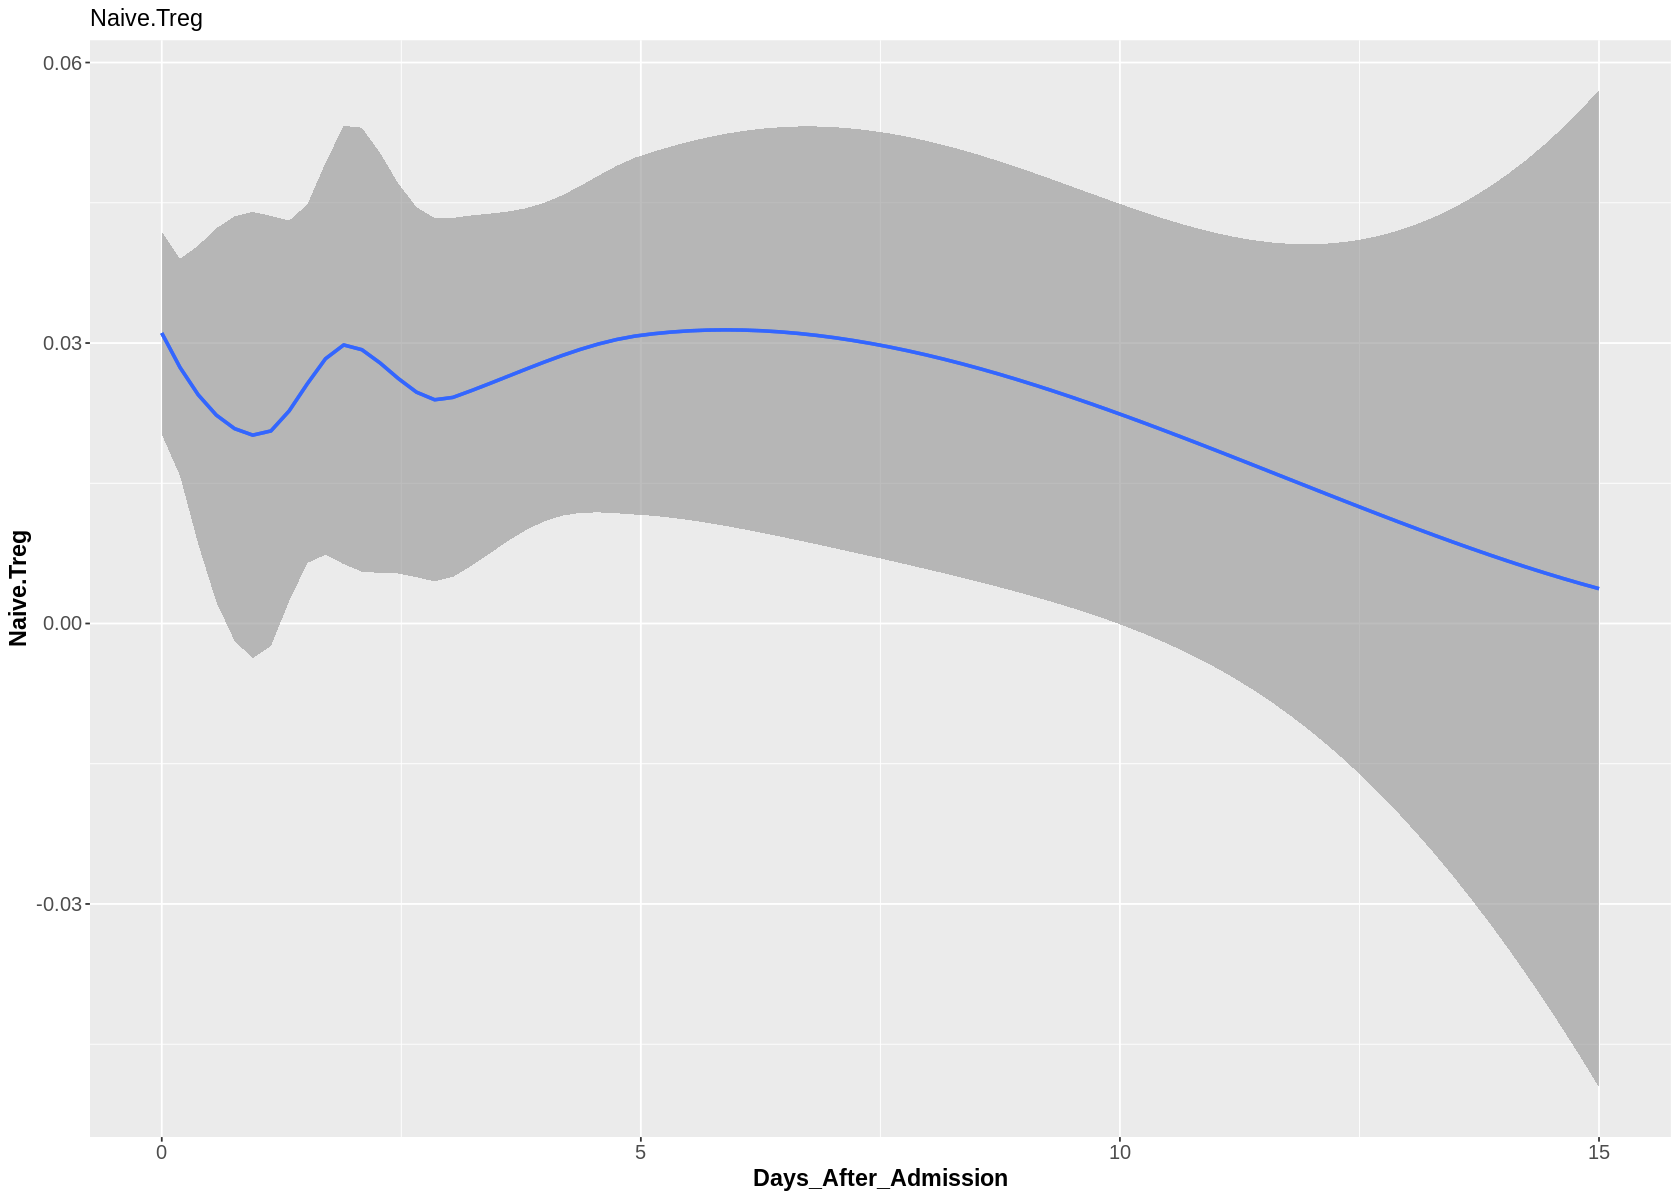

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”


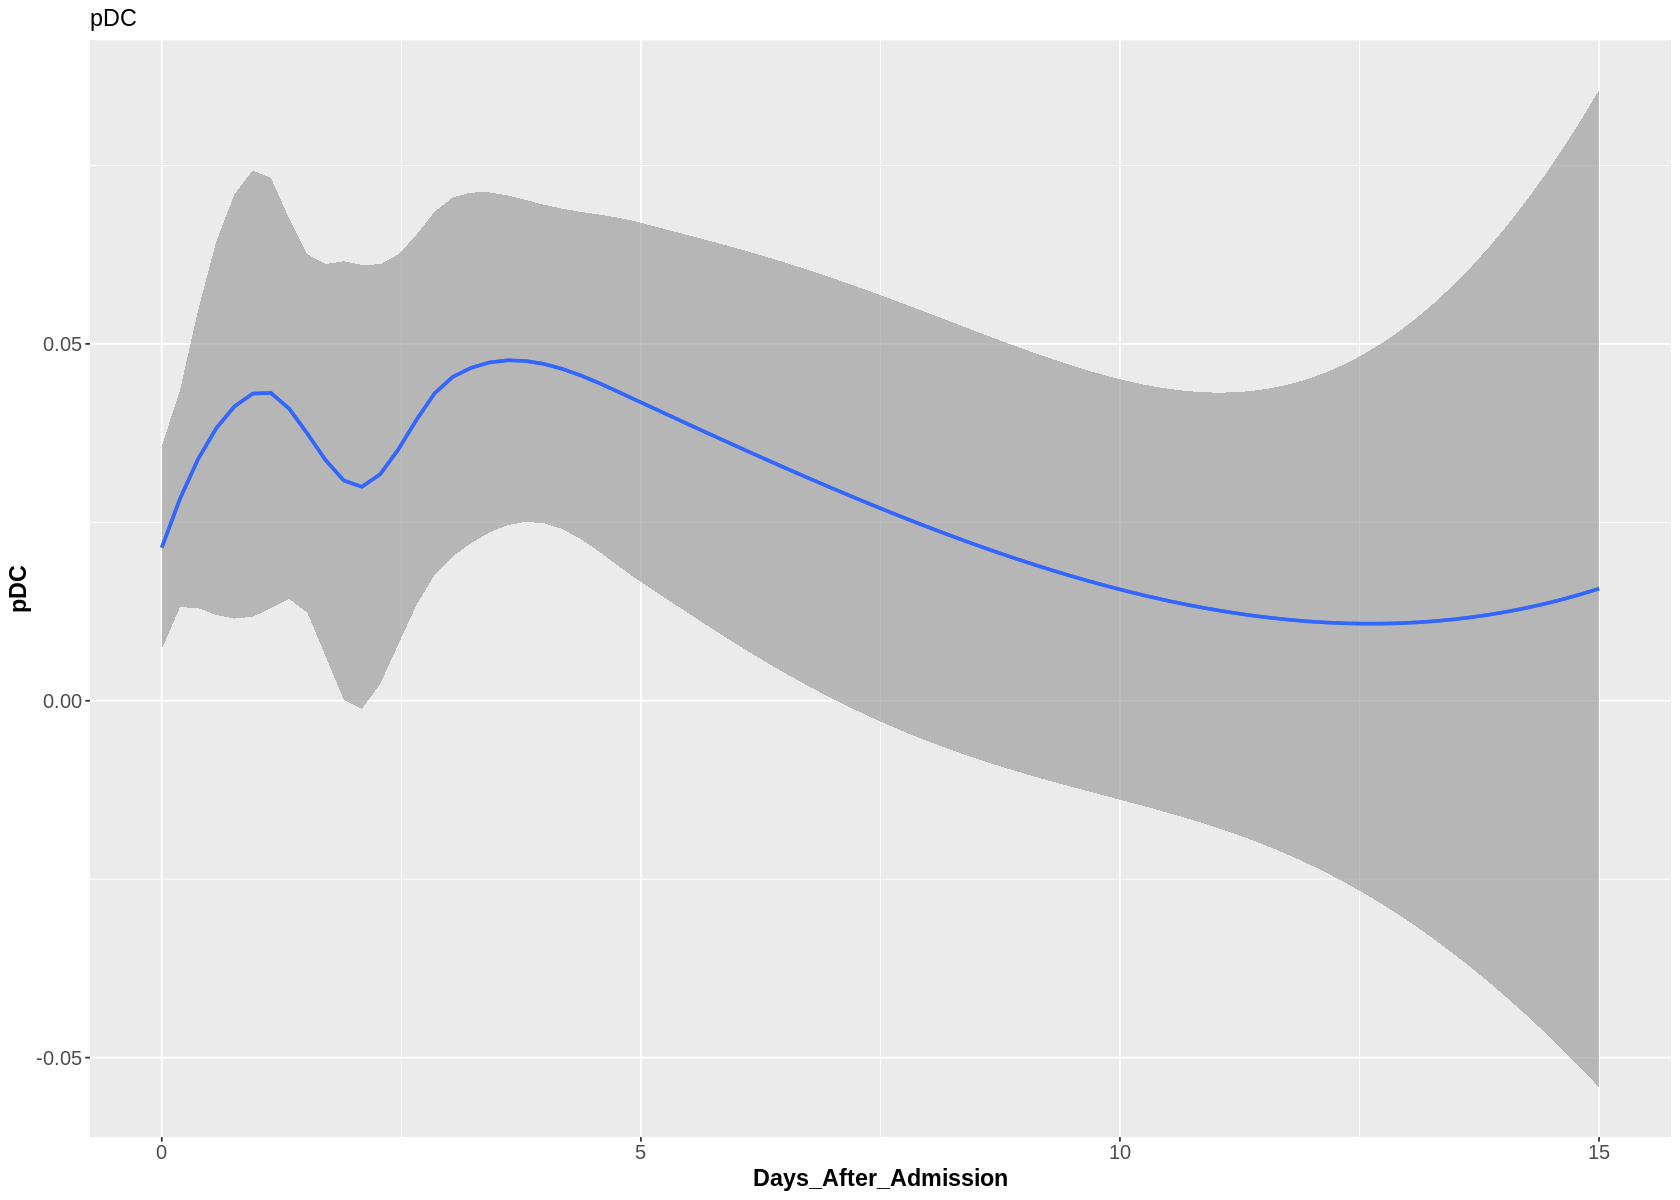

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”


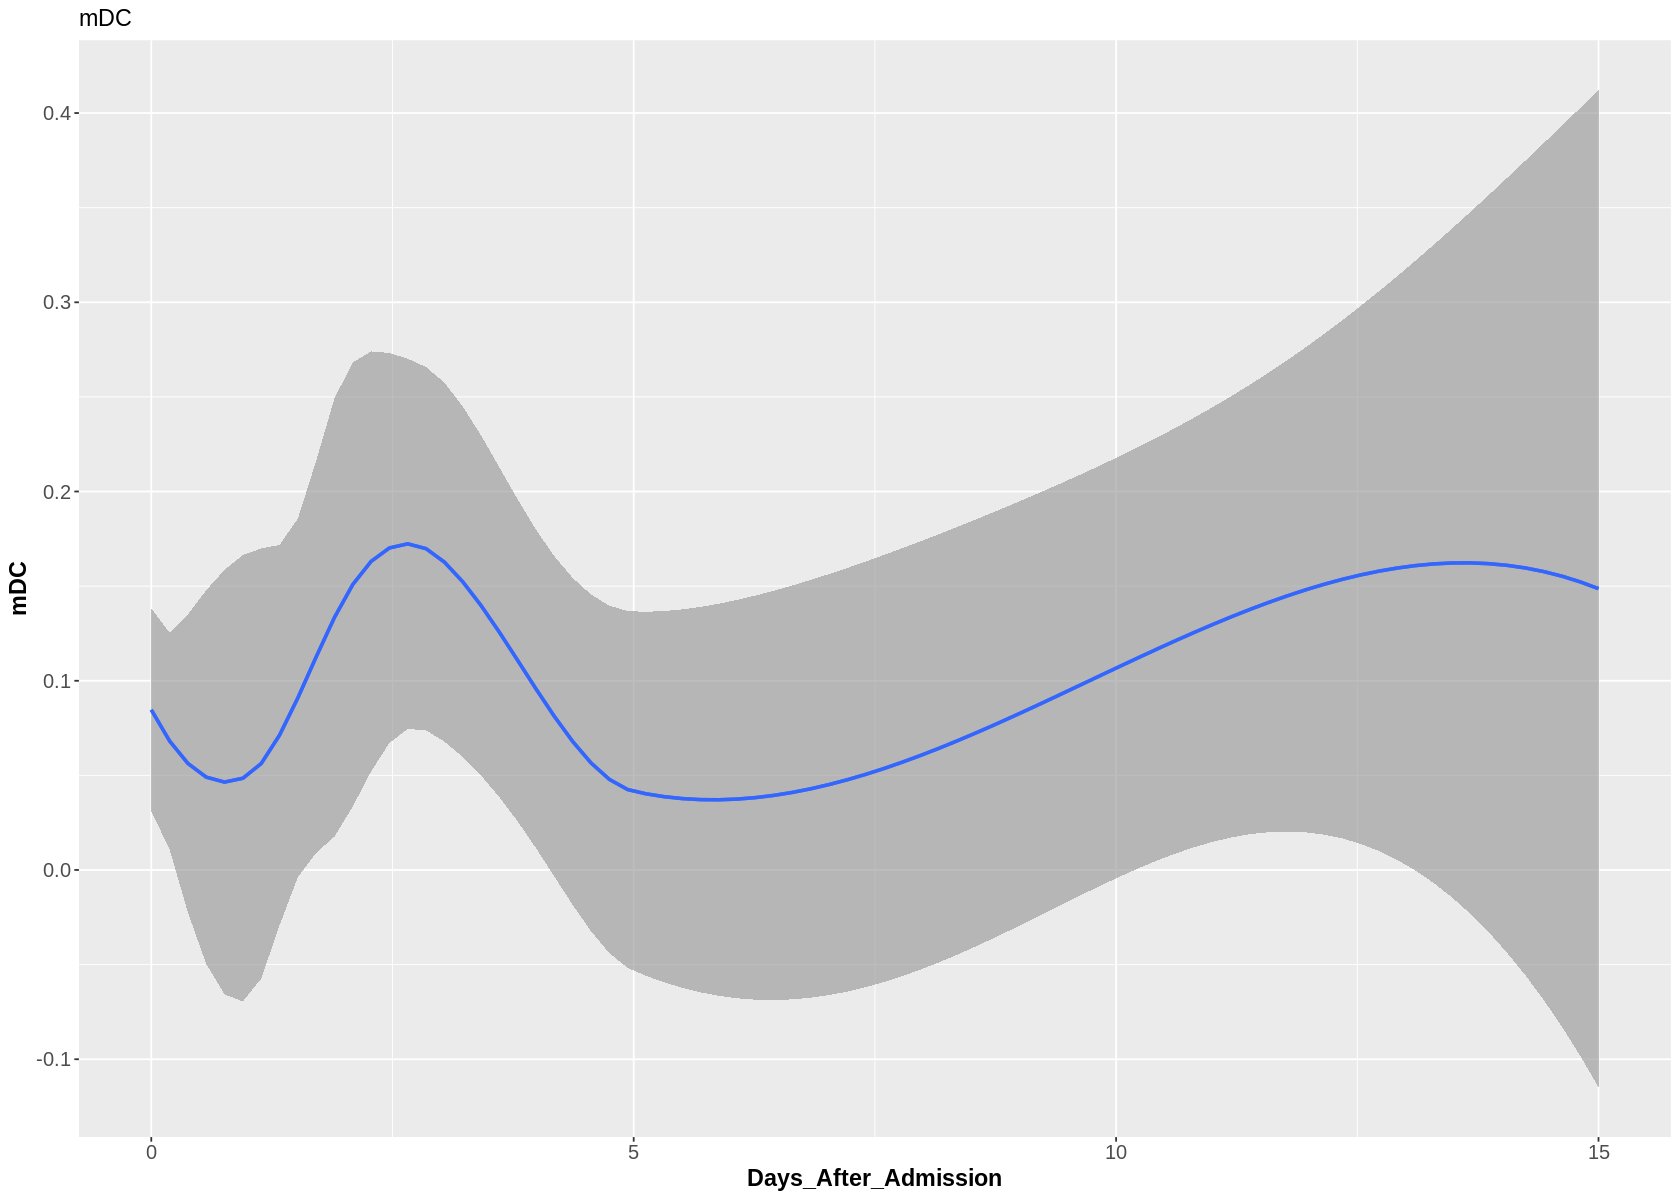

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”


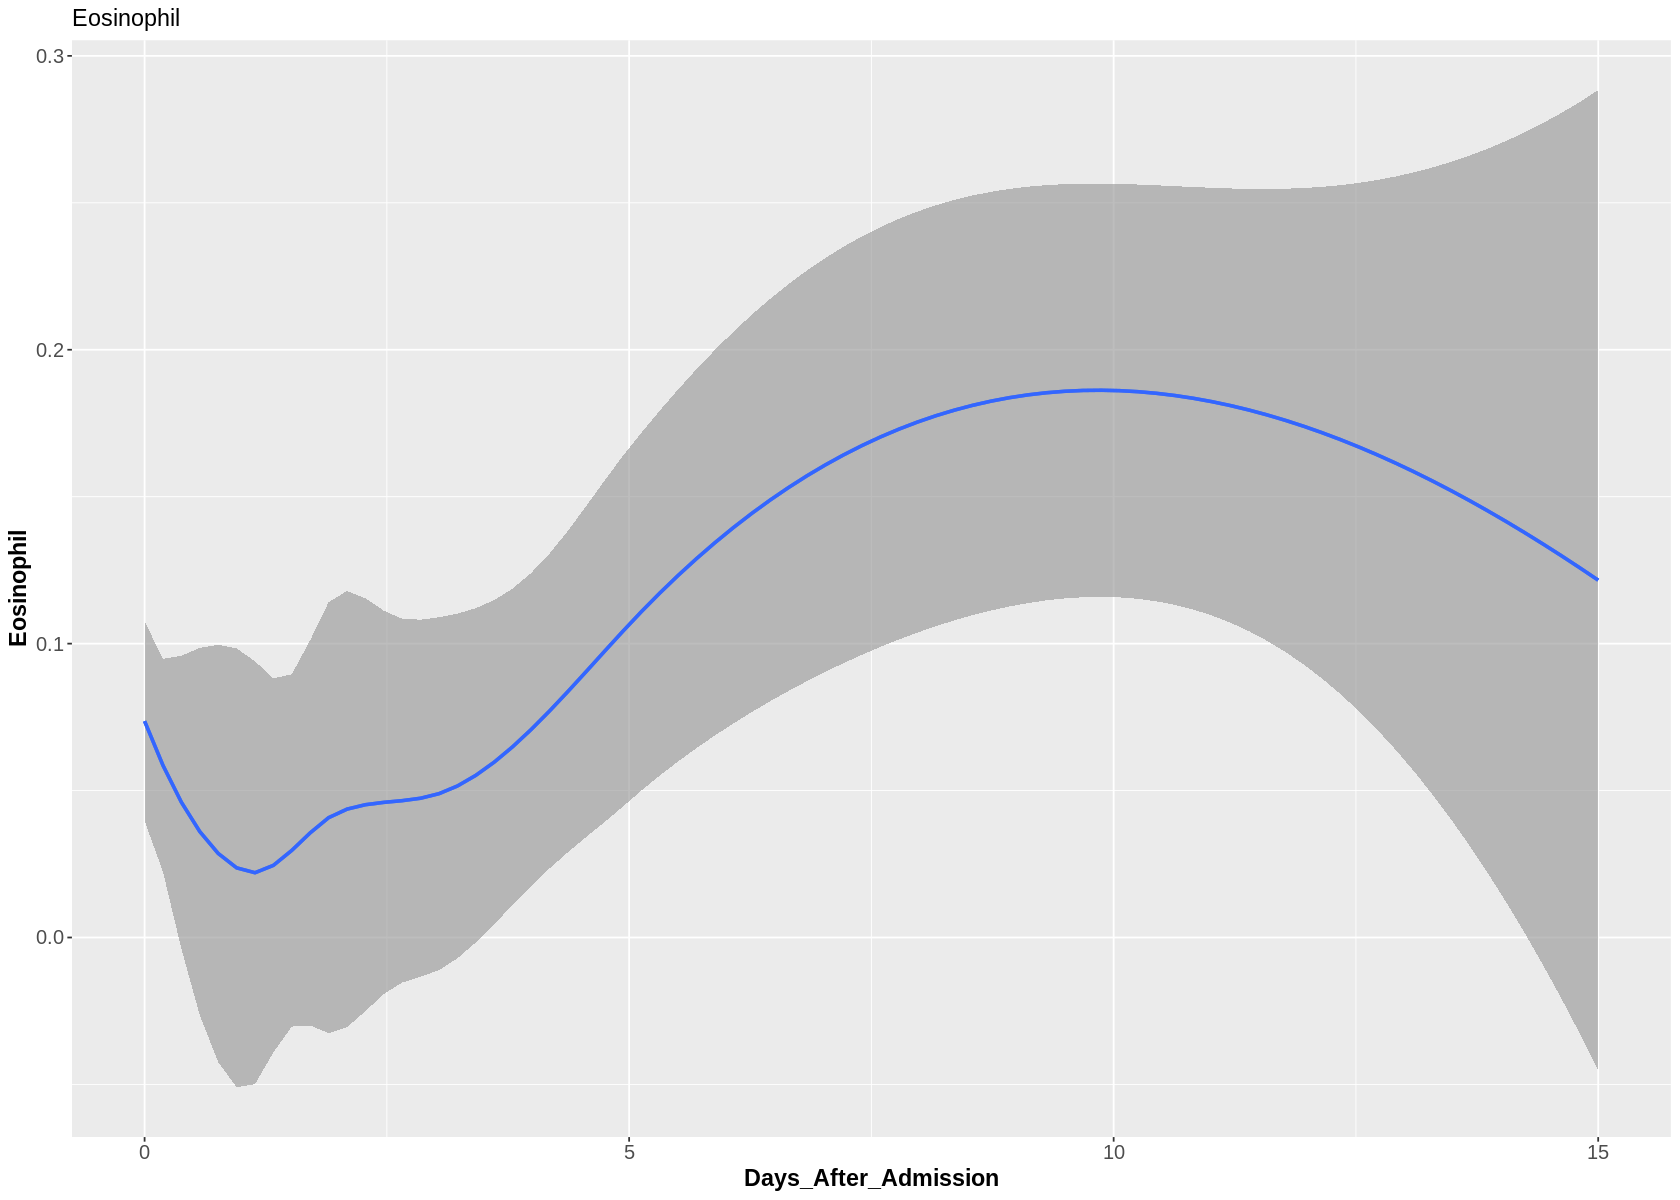

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”


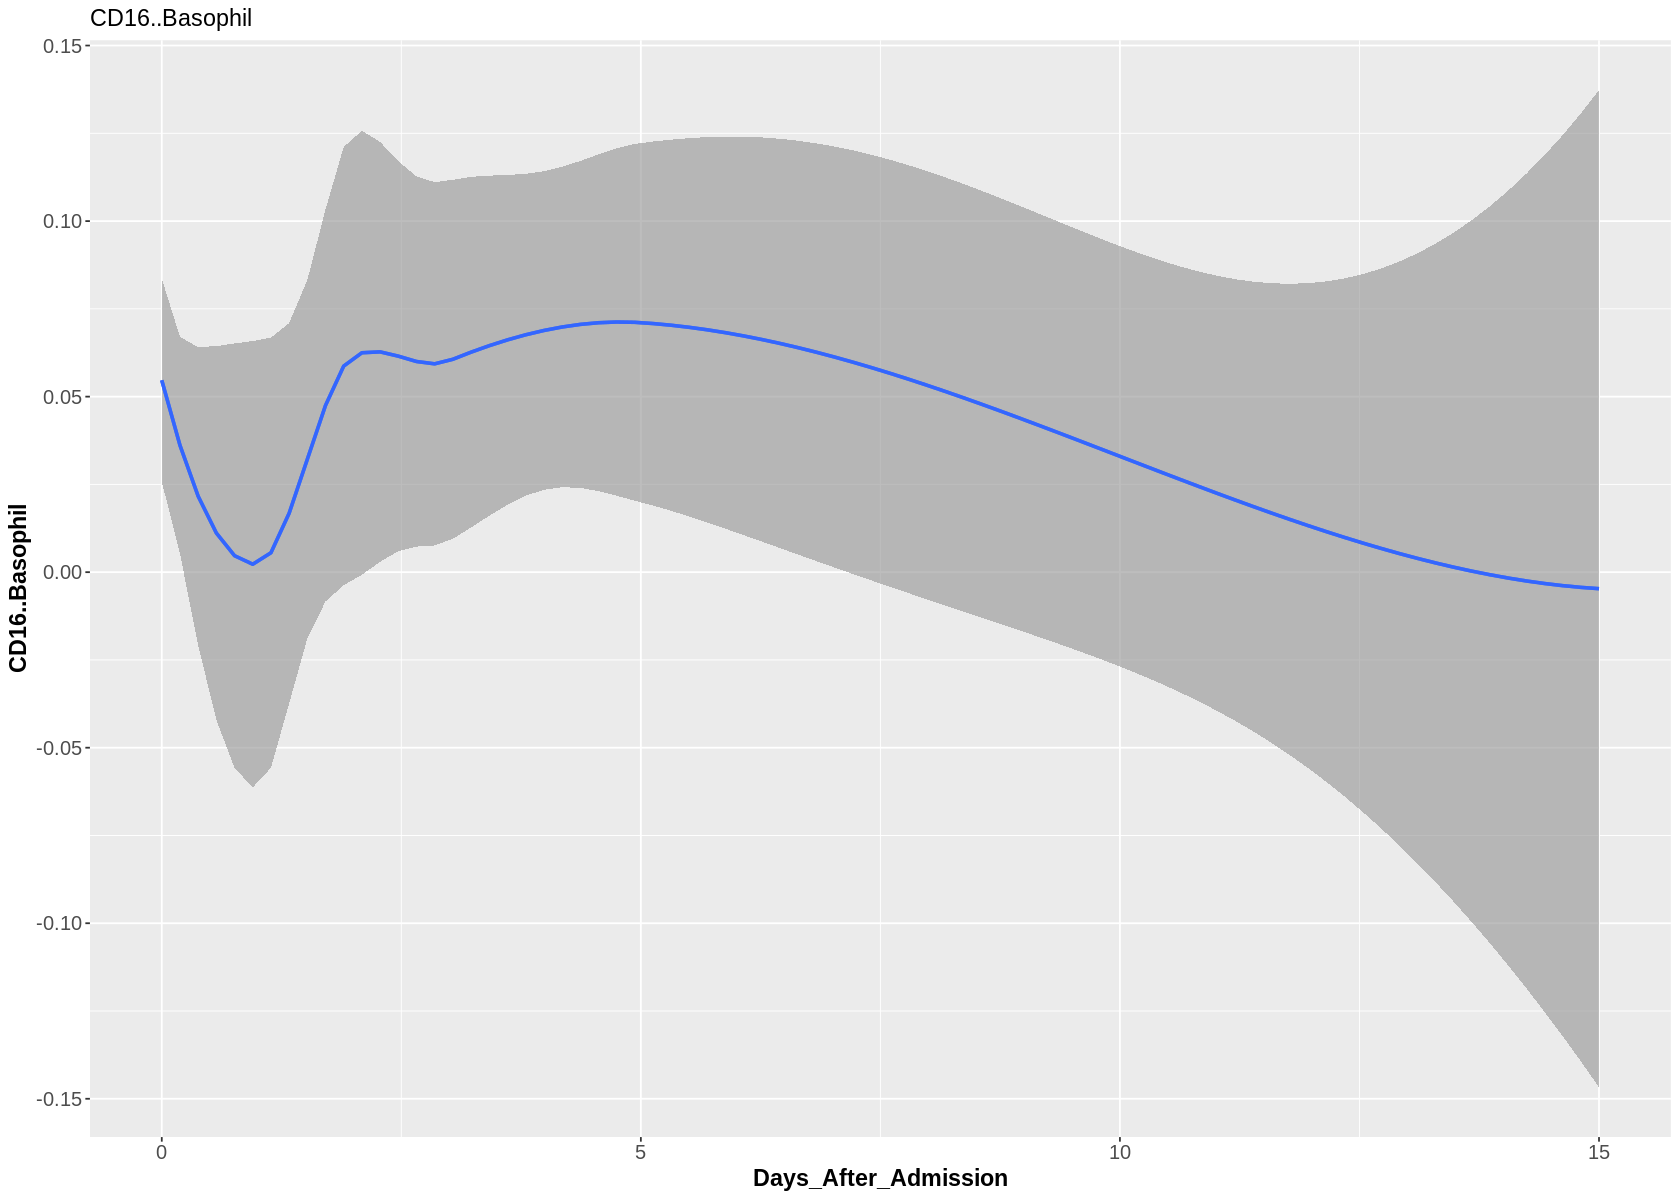

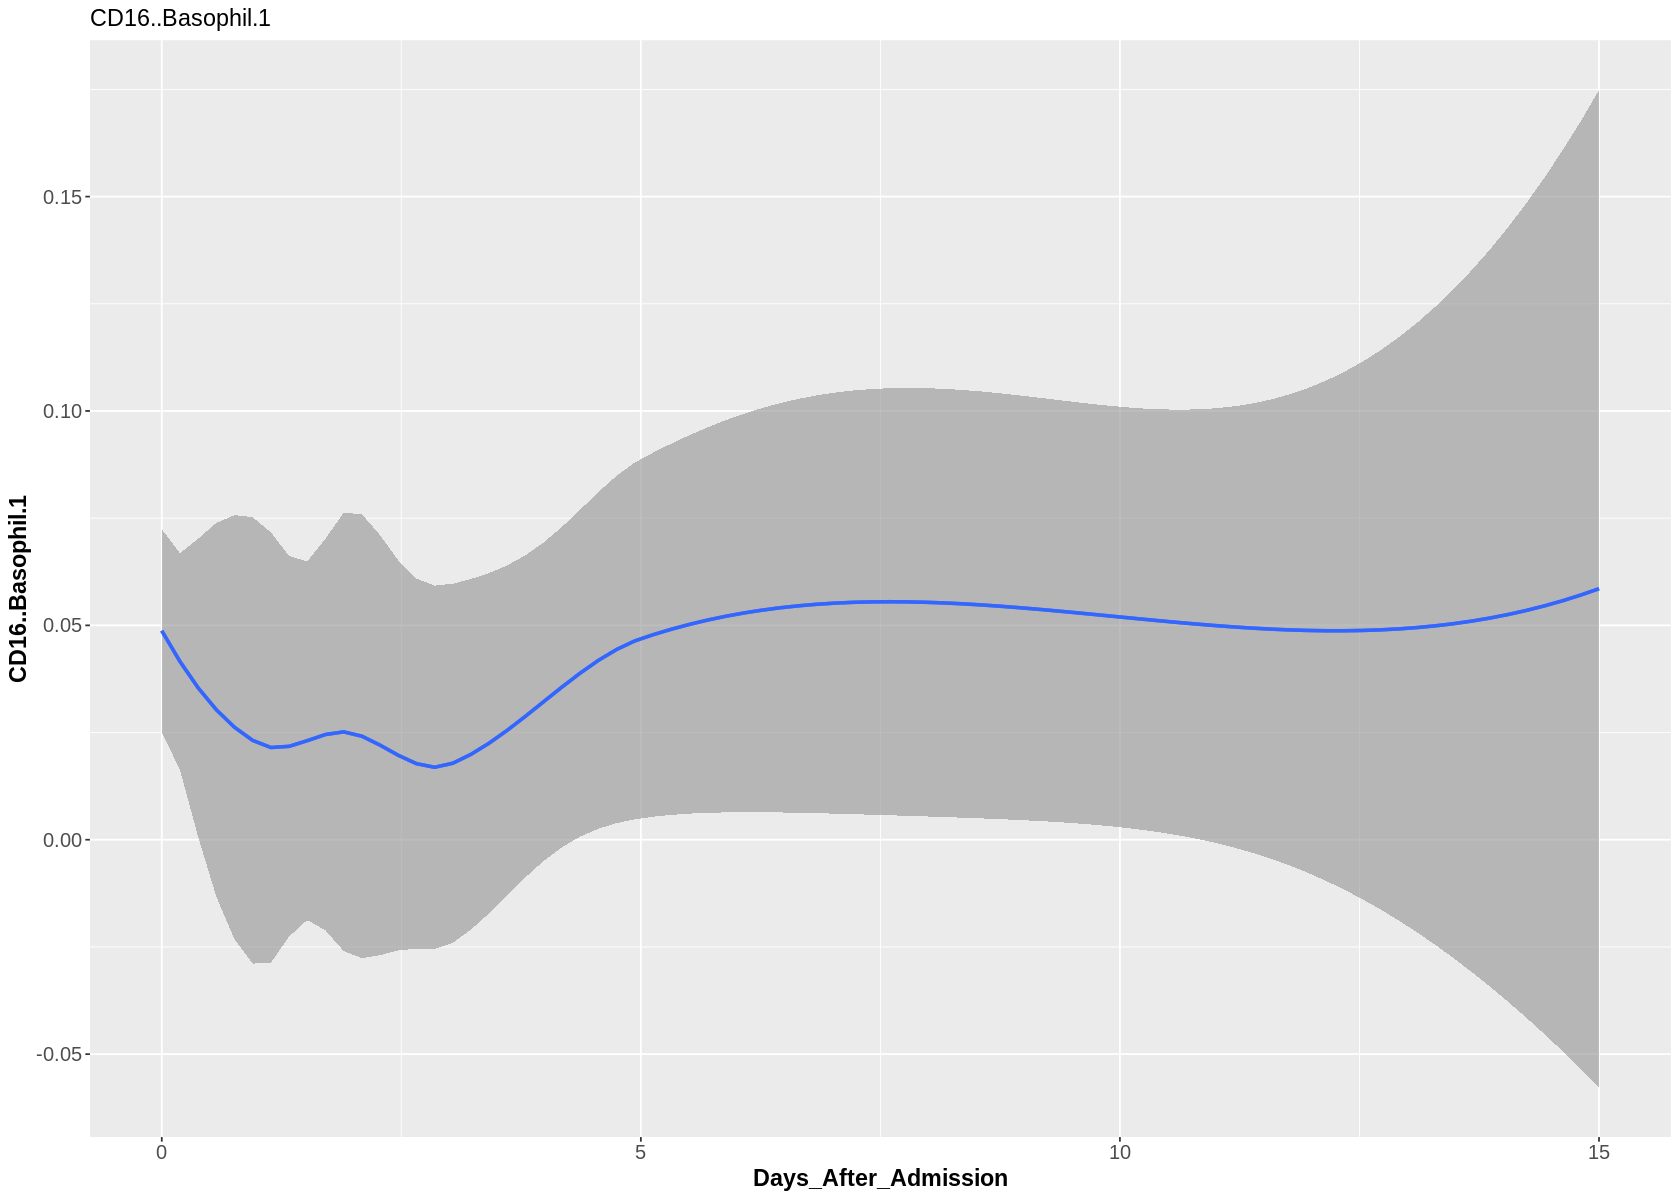

In [179]:
metadata_prop_sub_26 <- metadata_prop
ggplot(metadata_prop_sub_26, aes(Days_After_Admission,Neutrophil)) + 
geom_point(shape = 4) +
labs(x = 'Days_After_Admission', y = 'Neutrophil', title = "Neutrophil") + 
geom_smooth(method = "loess") +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

ggplot(metadata_prop_sub_26, aes(Days_After_Admission,CD4.T)) + 
geom_point(shape = 4) +
labs(x = 'Days_After_Admission', y = 'CD4.T', title = "CD4.T") + 
geom_smooth(method = "loess") +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

ggplot(metadata_prop_sub_26, aes(Days_After_Admission,CD8.T)) + 
geom_smooth(method = "loess") +
labs(x = 'Days_After_Admission', y = 'CD8.T', title = "CD8.T") + 
geom_smooth(method = "loess") +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

ggplot(metadata_prop_sub_26, aes(Days_After_Admission,Mem.Treg)) + 
geom_point(shape = 4) +
labs(x = 'Days_After_Admission', y = 'Mem.Treg', title = "Mem.Treg") + 
geom_smooth(method = "loess") +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

ggplot(metadata_prop_sub_26, aes(Days_After_Admission,gdT)) + 
geom_smooth(method = "loess") +
labs(x = 'Days_After_Admission', y = 'gdT', title = "gdT") + 
geom_smooth(method = "loess") +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

ggplot(metadata_prop_sub_26, aes(Days_After_Admission,Naive.Treg)) + 
geom_smooth(method = "loess") +
labs(x = 'Days_After_Admission', y = 'Naive.Treg', title = "Naive.Treg") + 
geom_smooth(method = "loess") +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

ggplot(metadata_prop_sub_26, aes(Days_After_Admission,pDC)) + 
geom_smooth(method = "loess") +
labs(x = 'Days_After_Admission', y = 'pDC', title = "pDC") + 
geom_smooth(method = "loess") +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

ggplot(metadata_prop_sub_26, aes(Days_After_Admission,mDC)) + 
geom_smooth(method = "loess") +
labs(x = 'Days_After_Admission', y = 'mDC', title = "mDC") + 
geom_smooth(method = "loess") +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

ggplot(metadata_prop_sub_26, aes(Days_After_Admission,Eosinophil)) + 
geom_smooth(method = "loess") +
labs(x = 'Days_After_Admission', y = 'Eosinophil', title = "Eosinophil") + 
geom_smooth(method = "loess") +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))


ggplot(metadata_prop_sub_26, aes(Days_After_Admission,CD16..Basophil)) + 
geom_smooth(method = "loess") +
labs(x = 'Days_After_Admission', y = 'CD16..Basophil', title = "CD16..Basophil") + 
geom_smooth(method = "loess") +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

ggplot(metadata_prop_sub_26, aes(Days_After_Admission,CD16..Basophil.1)) + 
geom_smooth(method = "loess") +
labs(x = 'Days_After_Admission', y = 'CD16..Basophil.1', title = "CD16..Basophil.1") + 
geom_smooth(method = "loess") +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

In [178]:
colnames(A0)

[1] "CD8.T"            "CD4.T"            "Mem.Treg"         "CD39.Mem.Treg"   
 [5] "Naive.Treg"       "gdT"              "Naive.B"          "Memory.B"        
 [9] "Plasmablast"      "NK"               "pDC"              "mDC"             
[13] "Monocyte"         "Eosinophil"       "Neutrophil"       "MAIT"            
[17] "CD16..Basophil"   "CD16..Basophil.1"